In [31]:
# Install missing package for statsmodels (run once in this environment)
%pip install statsmodels

# Import relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from pathlib import Path
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.miscmodels.ordinal_model import OrderedModel
import pingouin as pg
from scipy import stats

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: C:\Users\Admin\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [32]:
# Load the df_chat_surveys.csv file
data_dir = Path('chat_exports')
df_chat_surveys = pd.read_csv(data_dir / 'df_chat_surveys_standardized.csv', sep=',')
print(f"df_chat_surveys shape: {df_chat_surveys.shape}")
# Preview the dataset
df_chat_surveys.head()

df_chat_surveys shape: (45, 74)


,participant_id,created_at,ip_address,device_type,background_submitted_at,q1_age_group,q2_gender,q3_education,q4_employment,q5_nationality,...,q29_tool_easier_task,q30_tool_useful,q31_tool_too_much_info,q32_tool_difficult_focus,q33_results_accurate,q34_results_trust,q35_results_complete,q36_results_relevant,q37_results_useful,q40_purchase_likelihood
0,fe4a79bb-642e-49d8-920a-a5f39035ffe3,2025-11-20 16:22:11.281835+00,"84.17.45.206,84.17.45.206, 99.82.172.145",desktop,2025-11-20 16:23:00.392222+00:00,18-24,Female,High school or below,Student,Indo,...,6,5,7,6,7,5,5,6,7,2
1,151939c4-8aae-490b-92eb-c7d353a4a95c,2025-11-18 18:15:57.927115+00,"193.197.8.143,193.197.8.143, 99.82.163.77",desktop,2025-11-18 18:17:10.869409+00:00,35-44,Male,Master's degree,Employed,Iranian,...,6,7,6,4,4,5,5,5,5,6
2,e2f70344-8588-468c-9dc2-8c2993f5b6c9,2025-11-15 23:28:20.372283+00,"178.84.99.93,178.84.99.93, 3.2.59.182",desktop,2025-11-15 23:29:47.088239+00:00,18-24,Female,Bachelor's degree,Student,Nederland,...,5,5,6,5,3,4,4,6,3,5
3,88584cfe-a550-4209-a1f3-be628bb2647b,2025-11-13 16:29:27.470605+00,"89.92.129.28,89.92.129.28, 99.82.161.171",desktop,2025-11-13 16:30:20.934922+00:00,35-44,Male,Master's degree,Self-employed,French,...,6,6,6,4,5,5,5,5,5,4
4,25e47297-047a-4582-bc17-c13f5b2ef07b,2025-11-13 12:54:47.011689+00,"153.92.90.3,153.92.90.3, 99.82.163.72",mobile,2025-11-13 12:55:37.488309+00:00,18-24,Female,Bachelor's degree,Student,Georgian,...,5,5,4,5,7,7,7,7,7,4


In [33]:
# Load the df_gg_surveys.csv file
data_dir = Path('google_exports')
df_gg_surveys = pd.read_csv(data_dir / 'df_gg_surveys_standardised.csv', sep=',')
print(f"df_gg_surveys shape: {df_gg_surveys.shape}")
# Preview the dataset
df_gg_surveys.head()

df_gg_surveys shape: (52, 70)


,participant_id,q1_age_group,q2_gender,q3_education,q4_employment,q5_nationality,q5_nationality_sd,q6_residence,q6_residence_sd,q7_chatbot_familiarity,...,q42_comments,background_submitted_at,instruction_submitted_at,postsurvey_submitted_at,ip_address,device_type,results_submitted_at,session_start_time,session_end_time,session_duration_ms
0,09e6255b-ed66-4eea-a314-104a08130ac0,35-44,Female,Doctorate / PhD,Employed,UK,UK,UK,UK,7,...,"I liked the more minimal interface, and I like...",2025-10-31 22:11:56.864775+00:00,2025-10-31 22:12:41.977243+00:00,2025-10-31 22:22:26.969691+00:00,129.67.117.187,desktop,2025-10-31 22:19:44.042285+00:00,2025-10-31 22:10:58.834+00,2025-10-31 22:18:19.43+00,440596.0
1,15ef74b6-a61a-474c-b855-696b20ce58fb,55 and above,Male,Master's degree,Employed,German,Germany,Germany,Germany,1,...,Maybe,2025-10-24 14:12:35.527412+00:00,2025-10-24 14:21:30.862457+00:00,2025-10-24 14:28:43.167002+00:00,213.146.69.174,desktop,2025-10-24 14:27:11.483904+00:00,2025-10-24 14:11:51.631+00,2025-10-24 14:24:48.07+00,776439.0
2,1f0df1be-a1ea-4080-90c3-230fe9e35174,18-24,Female,Bachelor's degree,Student,United States,USA,United States,USA,6,...,"Yes, it showed me relevant results for what I ...",2025-11-10 03:25:51.855943+00:00,2025-11-10 03:26:25.769685+00:00,2025-11-10 03:29:58.830293+00:00,108.2.105.241,desktop,2025-11-10 03:28:20.935272+00:00,2025-11-10 03:25:14.283+00,2025-11-10 03:26:06.698+00,52415.0
3,2afa9961-1844-49e8-80fc-444466532f46,25-34,Female,Master's degree,Employed,Russian,Russia,Russia,Russia,6,...,"Yes, the tool was transparent and easy to use,...",2025-10-24 17:08:04.105300+00:00,2025-10-24 17:10:42.739044+00:00,2025-10-24 17:15:27.907607+00:00,2a00:1370:8180:f390:10f5:bcf9:8f0:be3f,mobile,2025-10-24 17:12:41.450159+00:00,2025-10-24 17:06:39.799+00,2025-10-24 17:10:49.029+00,249230.0
4,2d8dd1db-9d38-49e0-bf03-5b4735523d27,18-24,Female,High school or below,Student,Swiss,Switzerland,Switzerland,Switzerland,7,...,"No, AI didn’t show the classical bar abovd",2025-10-29 09:54:21.050268+00:00,2025-10-29 09:54:41.702835+00:00,2025-10-29 10:01:23.058400+00:00,172.225.188.246,mobile,2025-10-29 09:58:09.817211+00:00,2025-10-29 09:52:50.793+00,2025-10-29 09:54:46.465+00,115672.0


In [34]:
df_chat_surveys.columns

Index(['participant_id', 'created_at', 'ip_address', 'device_type',
       'background_submitted_at', 'q1_age_group', 'q2_gender', 'q3_education',
       'q4_employment', 'q5_nationality', 'q5_nationality_sd', 'q6_residence',
       'q6_residence_sd', 'q7_chatbot_familiarity', 'q8_data_quality',
       'q9_chatbot_usage', 'q10_search_tools', 'q10_tool_1', 'q10_tool_2',
       'q10_tool_3', 'q10_tool_4', 'q11_budget', 'instruction_submitted_at',
       'results_submitted_at', 'q12_brand_model', 'q12_brand_model_1_sd',
       'q12_brand_model_2_sd', 'q12_brand_only', 'q13_storage',
       'q13_storage_1_sd', 'q13_storage_2_sd', 'q14_color', 'q14_color_1_sd',
       'q14_color_2_sd', 'q14_color_3_sd', 'q14_color_4_sd', 'q14_color_5_sd',
       'q15_price', 'q15_price_euro', 'q15_price_range', 'q16_website',
       'q17_price_importance', 'q18_important_features', 'q18_feature_1',
       'q18_feature_2', 'q18_feature_3', 'postsurvey_submitted_at',
       'q38_attention', 'q41_duration', 'q

In [35]:
df_gg_surveys.columns

Index(['participant_id', 'q1_age_group', 'q2_gender', 'q3_education',
       'q4_employment', 'q5_nationality', 'q5_nationality_sd', 'q6_residence',
       'q6_residence_sd', 'q7_chatbot_familiarity', 'q8_data_quality',
       'q9_chatbot_usage', 'q10_search_tools', 'q10_tool_1', 'q10_tool_2',
       'q10_tool_3', 'q10_tool_4', 'q11_budget', 'q12_brand_model',
       'q12_brand_only', 'q13_storage', 'q13_storage_1_sd', 'q13_storage_2_sd',
       'q14_color', 'q14_color_1_sd', 'q15_price', 'q15_price_euro',
       'q15_price_range', 'q16_website', 'q17_price_importance',
       'q18_important_features', 'q18_feature_1', 'q18_feature_2',
       'q18_feature_3', 'q19_task_easy', 'q20_task_quick', 'q21_task_familiar',
       'q22_tool_reliable', 'q23_tool_practical', 'q24_tool_like',
       'q25_tool_easy_use', 'q26_tool_clear', 'q27_tool_control',
       'q28_tool_info_provided', 'q29_tool_easier_task', 'q30_tool_useful',
       'q31_tool_too_much_info', 'q32_tool_difficult_focus',
      

## RQ3: User Experience Comparison

### 3.1 Attitude towards the Tool (Questions 22-24)

In [36]:
# -------------------------------------------------------
# 1. LOAD DATA
# -------------------------------------------------------
# df_gg_surveys = pd.read_csv("/mnt/data/df_gg_surveys_standardised.csv")
# df_chat_surveys = pd.read_csv("/mnt/data/df_chat_surveys_standardized.csv")

# -------------------------------------------------------
# 2. ADD CONDITION VARIABLE
# Google = 0, Perplexity = 1
# -------------------------------------------------------
df_gg_surveys["condition"] = 0
df_chat_surveys["condition"] = 1

# -------------------------------------------------------
# 3. MERGE DATASETS
# -------------------------------------------------------
df = pd.concat([df_gg_surveys, df_chat_surveys], ignore_index=True)

# The three items used for the multi-item scale
items_22_24 = ["q22_tool_reliable", "q23_tool_practical", "q24_tool_like"]
cols_25_27 = ["condition"] + items_22_24

df_scale = df[cols_25_27].dropna()

# -------------------------------------------------------
# 4. COMPUTE CRONBACH'S ALPHA (MANUAL FORMULA)
# -------------------------------------------------------
item_scores = df_scale[items_22_24].to_numpy()

k = item_scores.shape[1]  # number of items
item_variances = item_scores.var(axis=0, ddof=1)
total_score_variance = item_scores.sum(axis=1).var(ddof=1)

alpha = k/(k-1) * (1 - item_variances.sum()/total_score_variance)

print("\n=== Cronbach's Alpha ===")
print(alpha)

# -------------------------------------------------------
# 5. CREATE COMPOSITE SCALE (MEAN SCORE)
# -------------------------------------------------------
df_scale["tool_eval_mean"] = df_scale[items].mean(axis=1)

print("\n=== Head of Composite Scale Data ===")
print(df_scale.head())

# -------------------------------------------------------
# 6. RUN OLS REGRESSION ON THE COMPOSITE SCALE
# -------------------------------------------------------
model_scale = smf.ols("tool_eval_mean ~ condition", data=df_scale).fit()

print("\n=== OLS Regression Results (Composite Scale) ===\n")
print(model_scale.summary())

# -------------------------------------------------------
# 7. GROUP MEANS (OPTIONAL)
# -------------------------------------------------------
print("\n=== Group Means (Google vs Perplexity) ===")
print(df_scale.groupby("condition")["tool_eval_mean"].mean())



=== Cronbach's Alpha ===
0.8987032079694561

0.8987032079694561


NameError: name 'items' is not defined

**Results on Affective and Attitude about the Tools:**
1. **Reliability (Cronbach´s alpha)**: Cronbach’s alpha was high (α ≈ 0.90), indicating that the three items (“reliable”, “practical”, “like”) form a coherent, internally consistent scale capturing participants’ overall attitude towards the tool.
2. **Difference in attitude between Google and Perplexity**: An OLS regression predicting the composite attitude score from tool condition (0 = Google, 1 = Perplexity) showed that participants tended to evaluate Google more favorably than Perplexity (b = -0.55, SE = 0.30, 95% CI [-1.14, 0.04]). However, this difference was only marginally significant and did not reach conventional levels of statistical significance (p = .067).
3. **Group means**: On the 7‑point attitude scale, participants evaluated Google more positively (M = 4.95) than Perplexity (M = 4.40) — about 0.55 points higher on average. This pattern is consistent with the negative regression coefficient, although the difference was only marginally significant (p = .067).

### 3.2 Perceived Ease of Use about the Tool (Questions 25-27)

In [ ]:
# -------------------------------------------------------
# 3.2 Attitude scale based on Q25–Q27
# -------------------------------------------------------

# 1. Specify items
items_25_27 = ["q25_tool_easy_use", "q26_tool_clear", "q27_tool_control"]  # <-- replace with exact column names
cols_25_27 = ["condition"] + items_25_27

# 2. Subset and drop rows with missing values in these items
df_scale_25_27 = df[cols_25_27].dropna()

# 3. Compute Cronbach's alpha (manual)
item_scores_25_27 = df_scale_25_27[items_25_27].to_numpy()

k_25_27 = item_scores_25_27.shape[1]  # number of items (3)
item_variances_25_27 = item_scores_25_27.var(axis=0, ddof=1)
total_score_variance_25_27 = item_scores_25_27.sum(axis=1).var(ddof=1)

alpha_25_27 = k_25_27/(k_25_27 - 1) * (1 - item_variances_25_27.sum() / total_score_variance_25_27)

print("\n=== Cronbach's Alpha (Q25–Q27 scale) ===")
print(alpha_25_27)

# 4. Create composite scale (mean of Q25–Q27)
df_scale_25_27["tool_eval_q25_27_mean"] = df_scale_25_27[items_25_27].mean(axis=1)

print("\n=== Head of Composite Scale Data (Q25–Q27) ===")
print(df_scale_25_27.head())

# 5. Run OLS regression: composite ~ condition
model_scale_25_27 = smf.ols("tool_eval_q25_27_mean ~ condition", data=df_scale_25_27).fit()

print("\n=== OLS Regression Results (Q25–Q27 Composite) ===\n")
print(model_scale_25_27.summary())

# 6. Group means for Google vs Perplexity
print("\n=== Group Means (Google vs Perplexity, Q25–Q27 scale) ===")
print(df_scale_25_27.groupby("condition")["tool_eval_q25_27_mean"].mean())


=== Cronbach's Alpha (Q25–Q27 scale) ===
0.8603600675939164

=== Head of Composite Scale Data (Q25–Q27) ===
   condition  q25_tool_easy_use  q26_tool_clear  q27_tool_control  \
0          0                  4               5                 5   
1          0                  5               5                 5   
2          0                  7               6                 6   
3          0                  7               7                 7   
4          0                  7               7                 7   

   tool_eval_q25_27_mean  
0               4.666667  
1               5.000000  
2               6.333333  
3               7.000000  
4               7.000000  

=== OLS Regression Results (Q25–Q27 Composite) ===

                              OLS Regression Results                             
Dep. Variable:     tool_eval_q25_27_mean   R-squared:                       0.064
Model:                               OLS   Adj. R-squared:                  0.055
Method:        

**Results on Perceived ease of using the tool:**
1. **Reliability (Cronbach’s alpha, Q25–Q27):** The perceived ease‑of‑use scale based on Questions 25–27 (q25_tool_easy_use, q26_tool_clear, q27_tool_control) showed good internal consistency (Cronbach’s alpha = 0.86). This indicates that the three items **coherently** measure participants’ perceived ease of using the tool.

2. **Difference in perceived ease of use between Google and Perplexity:** An OLS regression predicting the composite ease‑of‑use score from tool condition (0 = Google, 1 = Perplexity) showed that participants evaluated Google as easier to use than Perplexity (b = -0.69, SE = 0.27, 95% CI [-1.22, -0.15]). This difference was **statistically significant (p = .012)**, indicating a reliable advantage for Google in perceived ease of use.

3. **Group means (Q25–Q27 scale):** On the 7‑point ease‑of‑use scale, participants rated Google more positively (M = 5.49) than Perplexity (M = 4.81), a difference of about 0.69 points on average. This pattern is consistent with the negative regression coefficient and illustrates that **Google was clearly perceived as easier to use than Perplexity.**

### 3.3 Perceived Usefulness (Questions 28-30, 'q28_tool_info_provided', 'q29_tool_easier_task','q30_tool_useful')

In [ ]:
# -------------------------------------------------------
# 3.3 Perceived Usefulness (Q28–Q30)
# -------------------------------------------------------

# 1. Specify items
items_28_30 = ["q28_tool_info_provided", "q29_tool_easier_task", "q30_tool_useful"]
cols_28_30 = ["condition"] + items_28_30

# 2. Subset and drop rows with missing values in these items
df_scale_28_30 = df[cols_28_30].dropna()

# 3. Compute Cronbach's alpha (manual)
item_scores_28_30 = df_scale_28_30[items_28_30].to_numpy()

k_28_30 = item_scores_28_30.shape[1]  # number of items (3)
item_variances_28_30 = item_scores_28_30.var(axis=0, ddof=1)
total_score_variance_28_30 = item_scores_28_30.sum(axis=1).var(ddof=1)

alpha_28_30 = k_28_30/(k_28_30 - 1) * (1 - item_variances_28_30.sum() / total_score_variance_28_30)

print("\n=== Cronbach's Alpha (Q28–Q30 usefulness scale) ===")
print(alpha_28_30)

# 4. Create composite scale (mean of Q28–Q30)
df_scale_28_30["tool_eval_q28_30_mean"] = df_scale_28_30[items_28_30].mean(axis=1)

print("\n=== Head of Composite Scale Data (Q28–Q30) ===")
print(df_scale_28_30.head())

# 5. Run OLS regression: composite ~ condition
model_scale_28_30 = smf.ols("tool_eval_q28_30_mean ~ condition", data=df_scale_28_30).fit()

print("\n=== OLS Regression Results (Q28–Q30 Composite) ===\n")
print(model_scale_28_30.summary())

# 6. Group means for Google vs Perplexity
print("\n=== Group Means (Google vs Perplexity, Q28–Q30 usefulness scale) ===")
print(df_scale_28_30.groupby("condition")["tool_eval_q28_30_mean"].mean())


=== Cronbach's Alpha (Q28–Q30 usefulness scale) ===
0.8979854725015206

=== Head of Composite Scale Data (Q28–Q30) ===
   condition  q28_tool_info_provided  q29_tool_easier_task  q30_tool_useful  \
0          0                       5                     4                5   
1          0                       5                     5                5   
2          0                       6                     6                7   
3          0                       7                     7                7   
4          0                       7                     7                7   

   tool_eval_q28_30_mean  
0               4.666667  
1               5.000000  
2               6.333333  
3               7.000000  
4               7.000000  

=== OLS Regression Results (Q28–Q30 Composite) ===

                              OLS Regression Results                             
Dep. Variable:     tool_eval_q28_30_mean   R-squared:                       0.016
Model:                    

**Results on Perceived Usefulness of the Tool:**

1. **Reliability (Cronbach’s alpha, Q28–Q30):** The perceived usefulness scale based on Questions 28–30 (`q28_tool_info_provided`, `q29_tool_easier_task`, `q30_tool_useful`) showed good internal consistency (Cronbach’s alpha = 0.90). This indicates that the three items **coherently** measure participants’ perceived usefulness of the tool.

2. **Difference in perceived usefulness between Google and Perplexity:** An OLS regression predicting the composite usefulness score from tool condition (0 = Google, 1 = Perplexity) showed that participants tended to evaluate Google as more useful than Perplexity (b = -0.36, SE = 0.29, 95% CI [-0.93, 0.21]). However, this difference was **not statistically significant** (p = .213), so there is no clear evidence of a reliable usefulness advantage for either tool.

3. **Group means (Q28–Q30 usefulness scale):** On the 7‑point usefulness scale, participants rated Google slightly more positively (M = 5.12) than Perplexity (M = 4.76), a difference of about 0.36 points on average. This pattern is consistent with the negative regression coefficient but should be interpreted cautiously given the non‑significant p‑value.

### 3.4 Information Overload (Questions 31-32, q31_tool_too_much_info', 'q32_tool_difficult_focus')

In [ ]:
# -------------------------------------------------------
# 3.4 Information Overload (Q31–Q32)
# -------------------------------------------------------

# 1. Specify items
items_31_32 = ["q31_tool_too_much_info", "q32_tool_difficult_focus"]
cols_31_32 = ["condition"] + items_31_32

# 2. Subset and drop rows with missing values in these items
df_scale_31_32 = df[cols_31_32].dropna()

# 3. Compute Cronbach's alpha (manual)
item_scores_31_32 = df_scale_31_32[items_31_32].to_numpy()

k_31_32 = item_scores_31_32.shape[1]  # number of items (2)
item_variances_31_32 = item_scores_31_32.var(axis=0, ddof=1)
total_score_variance_31_32 = item_scores_31_32.sum(axis=1).var(ddof=1)

alpha_31_32 = k_31_32/(k_31_32 - 1) * (1 - item_variances_31_32.sum() / total_score_variance_31_32)

print("\n=== Cronbach's Alpha (Q31–Q32 information overload scale) ===")
print(alpha_31_32)

# 4. Create composite scale (mean of Q31–Q32)
df_scale_31_32["info_overload_mean"] = df_scale_31_32[items_31_32].mean(axis=1)

print("\n=== Head of Composite Scale Data (Q31–Q32) ===")
print(df_scale_31_32.head())

# 5. Run OLS regression: composite ~ condition
model_scale_31_32 = smf.ols("info_overload_mean ~ condition", data=df_scale_31_32).fit()

print("\n=== OLS Regression Results (Q31–Q32 Information Overload Composite) ===\n")
print(model_scale_31_32.summary())

# 6. Group means for Google vs Perplexity
print("\n=== Group Means (Google vs Perplexity, Q31–Q32 information overload scale) ===")
print(df_scale_31_32.groupby("condition")["info_overload_mean"].mean())


=== Cronbach's Alpha (Q31–Q32 information overload scale) ===
0.8070959473547901

=== Head of Composite Scale Data (Q31–Q32) ===
   condition  q31_tool_too_much_info  q32_tool_difficult_focus  \
0          0                       2                       1.0   
1          0                       2                       2.0   
2          0                       3                       3.0   
3          0                       2                       2.0   
4          0                       5                       4.0   

   info_overload_mean  
0                 1.5  
1                 2.0  
2                 3.0  
3                 2.0  
4                 4.5  

=== OLS Regression Results (Q31–Q32 Information Overload Composite) ===

                            OLS Regression Results                            
Dep. Variable:     info_overload_mean   R-squared:                       0.035
Model:                            OLS   Adj. R-squared:                  0.025
Method:           

**Results on Information Overload:**


1. **Reliability (Cronbach’s alpha, Q31–Q32):** The two‑item information‑overload scale (`q31_tool_too_much_info`, `q32_tool_difficult_focus`) showed acceptable internal consistency (Cronbach’s alpha = 0.81; exact 0.8071), indicating the items coherently capture perceived overload.


2. **Difference between Google and Perplexity:** An OLS regression predicting the composite overload score from tool condition (0 = Google, 1 = Perplexity) produced a positive but marginal effect (b = 0.61, SE = 0.33, 95% CI [-0.04, 1.27], p = .067). Participants tended to experience more overload with Perplexity, yet the confidence interval includes zero and the result does not reach conventional significance (p < .05).


3. **Group means (Q31–Q32 scale):** Google users reported lower overload (M = 4.01) than Perplexity users (M = 4.62), a mean difference of ≈ 0.61 points on the 7‑point scale. This directional pattern aligns with the regression coefficient but should be interpreted cautiously given the marginal p‑value and CI spanning zero.

### 3.5 Trust / Credibility of Results (Questions 33-35, 'q33_results_accurate', 'q34_results_trust', 'q35_results_complete',)

In [ ]:
# -------------------------------------------------------
# 3.5 Perceived Result Quality (Q33–Q35)
# -------------------------------------------------------

# 1. Specify items
items_33_35 = ["q33_results_accurate", "q34_results_trust", "q35_results_complete"]
cols_33_35 = ["condition"] + items_33_35

# 2. Subset and drop rows with missing values in these items
df_scale_33_35 = df[cols_33_35].dropna()

# 3. Compute Cronbach's alpha (manual)
item_scores_33_35 = df_scale_33_35[items_33_35].to_numpy()

k_33_35 = item_scores_33_35.shape[1]  # number of items (3)
item_variances_33_35 = item_scores_33_35.var(axis=0, ddof=1)
total_score_variance_33_35 = item_scores_33_35.sum(axis=1).var(ddof=1)

alpha_33_35 = k_33_35/(k_33_35 - 1) * (1 - item_variances_33_35.sum() / total_score_variance_33_35)

print("\n=== Cronbach's Alpha (Q33–Q35 result quality scale) ===")
print(alpha_33_35)

# 4. Create composite scale (mean of Q33–Q35)
df_scale_33_35["result_quality_mean"] = df_scale_33_35[items_33_35].mean(axis=1)

print("\n=== Head of Composite Scale Data (Q33–Q35) ===")
print(df_scale_33_35.head())

# 5. Run OLS regression: composite ~ condition
model_scale_33_35 = smf.ols("result_quality_mean ~ condition", data=df_scale_33_35).fit()

print("\n=== OLS Regression Results (Q33–Q35 Result Quality Composite) ===\n")
print(model_scale_33_35.summary())

# 6. Group means for Google vs Perplexity
print("\n=== Group Means (Google vs Perplexity, Q33–Q35 result quality scale) ===")
print(df_scale_33_35.groupby("condition")["result_quality_mean"].mean())


=== Cronbach's Alpha (Q33–Q35 result quality scale) ===
0.8451610099517621

=== Head of Composite Scale Data (Q33–Q35) ===
   condition  q33_results_accurate  q34_results_trust  q35_results_complete  \
0          0                     4                  4                     2   
1          0                     4                  4                     4   
2          0                     5                  4                     3   
3          0                     6                  6                     6   
4          0                     5                  4                     4   

   result_quality_mean  
0             3.333333  
1             4.000000  
2             4.000000  
3             6.000000  
4             4.333333  

=== OLS Regression Results (Q33–Q35 Result Quality Composite) ===

                             OLS Regression Results                            
Dep. Variable:     result_quality_mean   R-squared:                       0.010
Model:                 

**Results on Trust / Credibility of Results:**

1. **Reliability (Cronbach’s alpha, Q33–Q35):** The result‑quality scale based on Questions 33–35 (`q33_results_accurate`, `q34_results_trust`, `q35_results_complete`) showed good internal consistency (Cronbach’s alpha = 0.85). This indicates that the three items **coherently capture** participants’ perceived accuracy, trustworthiness, and completeness of the results.

2. **Difference in perceived result quality between Google and Perplexity:** An OLS regression predicting the composite result‑quality score from tool condition (0 = Google, 1 = Perplexity) suggested that participants tended to evaluate Google’s results slightly more positively than Perplexity’s (b = -0.25, SE = 0.26, 95% CI [-0.77, 0.26]). However, this difference was **not statistically significant** (p = .333), so there is no clear evidence of a reliable advantage for either tool in perceived result quality.

3. **Group means (Q33–Q35 result‑quality scale):** On the 7‑point result‑quality scale, participants rated **Google marginally higher** (M = 4.84) than Perplexity (M = 4.59), a difference of about 0.25 points on average. but without significant results.

### 3.6 Relevance of Results (Questions 36-37, 'q36_results_relevant', 'q37_results_useful')

In [ ]:
# -------------------------------------------------------
# 3.6 Relevance of Results (Q36–Q37)
# -------------------------------------------------------

# 1. Specify items
items_36_37 = ["q36_results_relevant", "q37_results_useful"]
cols_36_37 = ["condition"] + items_36_37

# 2. Subset and drop rows with missing values in these items
df_scale_36_37 = df[cols_36_37].dropna()

# 3. Compute Cronbach's alpha (manual)
item_scores_36_37 = df_scale_36_37[items_36_37].to_numpy()

k_36_37 = item_scores_36_37.shape[1]  # number of items (2)
item_variances_36_37 = item_scores_36_37.var(axis=0, ddof=1)
total_score_variance_36_37 = item_scores_36_37.sum(axis=1).var(ddof=1)

alpha_36_37 = k_36_37/(k_36_37 - 1) * (1 - item_variances_36_37.sum() / total_score_variance_36_37)

print("\n=== Cronbach's Alpha (Q36–Q37 relevance scale) ===")
print(alpha_36_37)

# 4. Create composite scale (mean of Q36–Q37)
df_scale_36_37["results_relevance_mean"] = df_scale_36_37[items_36_37].mean(axis=1)

print("\n=== Head of Composite Scale Data (Q36–Q37) ===")
print(df_scale_36_37.head())

# 5. Run OLS regression: composite ~ condition
model_scale_36_37 = smf.ols("results_relevance_mean ~ condition", data=df_scale_36_37).fit()

print("\n=== OLS Regression Results (Q36–Q37 Results Relevance Composite) ===\n")
print(model_scale_36_37.summary())

# 6. Group means for Google vs Perplexity
print("\n=== Group Means (Google vs Perplexity, Q36–Q37 relevance scale) ===")
print(df_scale_36_37.groupby("condition")["results_relevance_mean"].mean())


=== Cronbach's Alpha (Q36–Q37 relevance scale) ===
0.9270119042876441

=== Head of Composite Scale Data (Q36–Q37) ===
   condition  q36_results_relevant  q37_results_useful  results_relevance_mean
0          0                   5.0                 5.0                     5.0
1          0                   5.0                 5.0                     5.0
2          0                   6.0                 6.0                     6.0
3          0                   7.0                 7.0                     7.0
4          0                   5.0                 5.0                     5.0

=== OLS Regression Results (Q36–Q37 Results Relevance Composite) ===

                              OLS Regression Results                              
Dep. Variable:     results_relevance_mean   R-squared:                       0.008
Model:                                OLS   Adj. R-squared:                 -0.002
Method:                     Least Squares   F-statistic:                    0.7905
Date

**Results on Relevance of Results:**


1. **Reliability (Cronbach’s alpha, Q36–Q37):** The relevance scale based on Questions 36–37 (`q36_results_relevant`, `q37_results_useful`) showed excellent internal consistency (Cronbach’s alpha = 0.93). This indicates that the two items form a very **coherent scale** capturing how relevant and useful participants perceived the search results to be.


2. **Difference in perceived relevance between Google and Perplexity:** An OLS regression predicting the composite relevance score from tool condition (0 = Google, 1 = Perplexity) yielded a small, non‑significant effect (b = -0.26, SE = 0.29, 95% CI [-0.84, 0.32], p = .376). Participants tended to rate Google’s results slightly more relevant, but this difference was **not statistically significant**, providing no reliable evidence of a relevance advantage for either tool.


3. **Group means (Q36–Q37 relevance scale):** On the 7‑point relevance scale, participants rated Google’s results marginally higher (M = 5.08) than Perplexity’s (M = 4.82), a mean difference of about 0.26 points. This small difference aligns with the negative regression coefficient but should be interpreted cautiously given the non‑significant p‑value.

## RQ2: Search Efficiency Comparison

### 2.1 Search Time

In [ ]:
data_dir = Path("google_exports")
df_gg_search_session_filtered = pd.read_csv(data_dir / "df_gg_search_session_filtered.csv", sep=",")
print(f"df_gg_search_session_filtered shape: {df_gg_search_session_filtered.shape}")
df_gg_search_session_filtered.head()

df_gg_search_session_filtered shape: (52, 7)



,session_id,participant_id,session_start_time,session_end_time,query_count,total_clicked_results_count,session_duration_ms
0,ae444d00-9295-437f-812b-f75240800327,09e6255b-ed66-4eea-a314-104a08130ac0,2025-10-31 22:10:58.834+00,2025-10-31 22:18:19.430000+00:00,7,7,440596.0
1,e7bda5fc-cfa3-4a62-b701-d12a2294b0c5,15ef74b6-a61a-474c-b855-696b20ce58fb,2025-10-24 14:11:51.631+00,2025-10-24 14:24:48.070000+00:00,3,2,776439.0
2,e008edb8-e4d7-4e49-a8fd-2b72958fec02,1f0df1be-a1ea-4080-90c3-230fe9e35174,2025-11-10 03:25:14.283+00,2025-11-10 03:26:06.698000+00:00,2,2,52415.0
3,221af9d0-3577-41d0-b7fc-1b0eea1320eb,2afa9961-1844-49e8-80fc-444466532f46,2025-10-24 17:06:39.799+00,2025-10-24 17:10:49.029000+00:00,1,1,249230.0
4,2df6d1d2-60fb-4e27-8877-bdd2ebf01465,2d8dd1db-9d38-49e0-bf03-5b4735523d27,2025-10-29 09:52:50.793+00,2025-10-29 09:54:46.465000+00:00,1,2,115672.0


In [ ]:
df_search_session_filtered = pd.read_csv(Path("chat_exports") / "df_search_session_filtered.csv", sep=",")
print(f"df_search_session_filtered shape: {df_search_session_filtered.shape}")
df_search_session_filtered.head()

df_search_session_filtered shape: (102, 5)


,participant_id,session_start_time,session_end_time,session_duration_ms,record_created_at
0,fe4a79bb-642e-49d8-920a-a5f39035ffe3,2025-11-20 16:28:00.829+00,2025-11-20 16:28:10.12+00,9291.0,2025-11-20 16:28:02.231156+00
1,fe4a79bb-642e-49d8-920a-a5f39035ffe3,2025-11-20 16:27:27.603+00,2025-11-20 16:27:50.572+00,22969.0,2025-11-20 16:27:29.591439+00
2,fe4a79bb-642e-49d8-920a-a5f39035ffe3,2025-11-20 16:23:39.474+00,2025-11-20 16:26:48.525+00,189051.0,2025-11-20 16:23:41.070405+00
3,fe4a79bb-642e-49d8-920a-a5f39035ffe3,2025-11-20 16:23:08.415+00,2025-11-20 16:23:30.53+00,22115.0,2025-11-20 16:23:31.852449+00
4,fe4a79bb-642e-49d8-920a-a5f39035ffe3,2025-11-20 16:23:08.415+00,2025-11-20 16:23:29.747+00,21332.0,2025-11-20 16:23:09.530918+00


In [ ]:
unique_participants = df_search_session_filtered["participant_id"].nunique()
print(f"Unique participant_id count in df_search_session_filtered: {unique_participants}")

Unique participant_id count in df_search_session_filtered: 45


In [ ]:
df_chat_sessions_latest = (
    df_search_session_filtered.assign(
        record_created_at=pd.to_datetime(df_search_session_filtered["record_created_at"]),
        session_duration_ms=pd.to_numeric(df_search_session_filtered["session_duration_ms"], errors="coerce")
    )
    .sort_values("record_created_at", ascending=False)
    .drop_duplicates(subset="participant_id")
    .loc[:, ["participant_id", "record_created_at", "session_duration_ms"]]
    .reset_index(drop=True)
)

df_chat_sessions_latest["session_duration_sec"] = df_chat_sessions_latest["session_duration_ms"] / 1000
df_chat_sessions_latest.shape

(45, 4)

In [ ]:
perplexity_source = df_sessions_latest if "df_sessions_latest" in globals() else df_chat_sessions_latest

google_time = (
    df_gg_search_session_filtered.loc[:, ["participant_id", "session_duration_ms"]]
    .assign(
        session_duration_ms=lambda d: pd.to_numeric(d["session_duration_ms"], errors="coerce"),
        condition=0
    )
    .dropna(subset=["session_duration_ms"])
)

perplexity_time = (
    perplexity_source.loc[:, ["participant_id", "session_duration_ms"]]
    .assign(
        session_duration_ms=lambda d: pd.to_numeric(d["session_duration_ms"], errors="coerce"),
        condition=1
    )
    .dropna(subset=["session_duration_ms"])
)

df_search_time = pd.concat([google_time, perplexity_time], ignore_index=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_21184\2114882058.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
C:\Users\Admin\AppData\Local\Temp\ipykernel_21184\2114882058.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


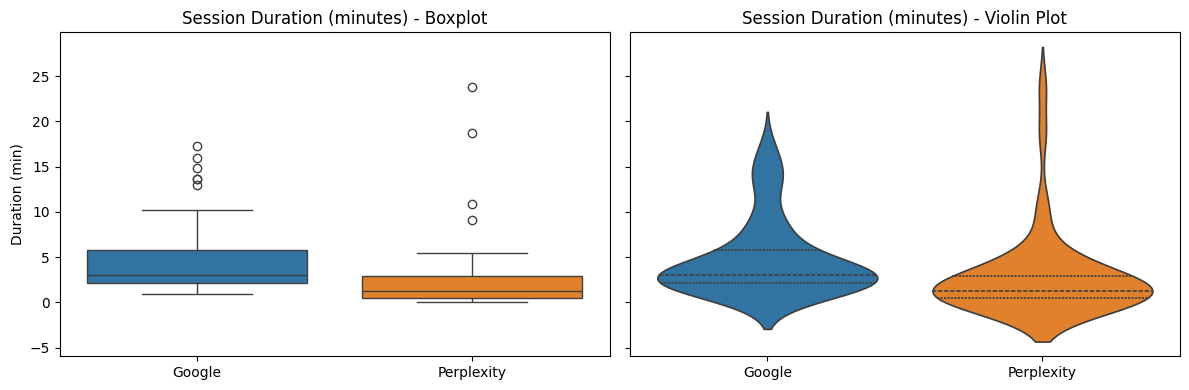

In [ ]:
plot_df = (
    pd.concat(
        [
            google_time.assign(tool="Google"),
            perplexity_time.assign(tool="Perplexity"),
        ],
        ignore_index=True,
    )
    .dropna(subset=["session_duration_ms"])
    .assign(time_min=lambda d: d["session_duration_ms"] / 60000)
)

fig, axes = plt.subplots(1, 2, figsize=(12, 4), sharey=True)

sns.boxplot(
    data=plot_df,
    x="tool",
    y="time_min",
    ax=axes[0],
    palette=["#1f77b4", "#ff7f0e"],
)
axes[0].set_title("Session Duration (minutes) - Boxplot")
axes[0].set_xlabel("")
axes[0].set_ylabel("Duration (min)")

sns.violinplot(
    data=plot_df,
    x="tool",
    y="time_min",
    ax=axes[1],
    inner="quartile",
    palette=["#1f77b4", "#ff7f0e"],
)
axes[1].set_title("Session Duration (minutes) - Violin Plot")
axes[1].set_xlabel("")
axes[1].set_ylabel("")

plt.tight_layout()
plt.show()

In [ ]:
condition_map = {0: "Google", 1: "Perplexity"}

time_summary = (
    df_search_time
    .assign(session_duration_min=lambda d: d["session_duration_ms"] / 60000)
    .groupby("condition")["session_duration_min"]
    .agg(avg_minutes="mean", min_minutes="min", max_minutes="max")
    .rename(index=condition_map)
)

print("Session duration (minutes) by condition:")
display(time_summary.round(2))

Session duration (minutes) by condition:


,avg_minutes,min_minutes,max_minutes
condition,,,
Google,4.82,0.87,17.23
Perplexity,2.86,0.06,23.81


In [ ]:
# ============================================
# 1. IMPORT LIBRARIES
# ============================================
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf

# ============================================
# 2. LOAD YOUR DATAFRAMES
# (you should already have:)
# df_gg_search_session_filtered
# df_chat_sessions_latest
# ============================================

# --- Google condition ---
gg = df_gg_search_session_filtered[['session_duration_ms']].copy()
gg['condition'] = 0        # 0 = Google

# --- Perplexity condition ---
px = df_chat_sessions_latest[['session_duration_ms']].copy()
px['condition'] = 1        # 1 = Perplexity

# ============================================
# 3. COMBINE INTO ONE DATAFRAME
# ============================================
df = pd.concat([gg, px], ignore_index=True)

# Convert milliseconds → seconds (nicer interpretation)
df['time_sec'] = df['session_duration_ms'] / 1000

# ============================================
# 4. OPTIONAL: REMOVE EXTREME OUTLIERS
# (Adjust thresholds if needed)
# ============================================
# df = df[(df['time_sec'] > 1) & (df['time_sec'] < 600)]

# ============================================
# 5. LOG TRANSFORM (RECOMMENDED)
# ============================================
df['log_time'] = np.log(df['time_sec'])

# ============================================
# 6. RUN OLS REGRESSION
# condition = 0 (Google), 1 (Perplexity)
# ============================================
model = smf.ols('log_time ~ condition', data=df).fit(cov_type='HC3')
print(model.summary())

# ============================================
# 7. INTERPRET CONDITION EFFECT IN %
# beta1 > 0 → Perplexity slower
# beta1 < 0 → Perplexity faster
# ============================================
beta1 = model.params['condition']
percent_diff = (np.exp(beta1) - 1) * 100
print(f"\nPerplexity vs Google search time difference: {percent_diff:.2f}%")


                            OLS Regression Results                            
Dep. Variable:               log_time   R-squared:                       0.208
Model:                            OLS   Adj. R-squared:                  0.200
Method:                 Least Squares   F-statistic:                     22.06
Date:                 Mi, 03 Dez 2025   Prob (F-statistic):           9.01e-06
Time:                        11:49:41   Log-Likelihood:                -143.91
No. Observations:                  96   AIC:                             291.8
Df Residuals:                      94   BIC:                             296.9
Df Model:                           1                                         
Covariance Type:                  HC3                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.3683      0.105     50.946      0.0

Results from the regression analysis of search time between 2 conditions: 
1. We regressed log-transformed session duration on a binary tool indicator (0 = Google, 1 = Perplexity). Participants using Perplexity had substantially shorter sessions than those using Google (b = −1.12, SE ≈ 0.24, z = −4.70, p < .001, R² = .21). Back-transforming the coefficient implies that Perplexity sessions were on average about 67% shorter than Google sessions (95% CI: 48%–79% reduction), corresponding to roughly 1.2 minutes vs. 3.6 minutes per session.
2. Omnibus p = 0.554, JB p = 0.718 → residuals look approximately normal on log_time.
3. R² ≈ 0.21, strong and significant effect of condition (p < .001).
4. Durbin–Watson ≈ 1.96 → no obvious autocorrelation problem.

### 2.2 Number of queries or prompts per participant

In [ ]:
if "query_count" not in df_gg_search_session_filtered.columns:
    df_gg_search_session_filtered = df_gg_search_session_filtered.merge(
        gg_queries_per_participant[["participant_id", "query_count"]],
        on="participant_id",
        how="left"
    )

query_per_participant = df_gg_search_session_filtered["query_count"].copy()

In [ ]:
data_dir_chat = Path("chat_exports")
df_chat_search_filtered = pd.read_csv(data_dir_chat / "df_chat_search_filtered.csv", sep=",")
print(f"df_chat_search_filtered shape: {df_chat_search_filtered.shape}")
df_chat_search_filtered.head()

df_chat_search_filtered shape: (143, 11)


,participant_id,prompt,response,logged_at,query_start_time,query_submit_time,query_duration_ms,query_sequence_number,prompt_index,url,clicked_at
0,090b95b5-f52a-4e45-8665-1cc819388638,What is a realistic phone when it comes to cos...,A realistic phone with the best cost-to-qualit...,2025-11-07 15:08:07.503559+00,2025-11-07 15:05:33.382+00,2025-11-07 15:07:50.895000+00:00,137513.0,1,NaN,NaN,NaN
1,0ba4f0a8-673f-4054-80e0-690aaf497b51,What phones are currently available on the mar...,Several **excellent budget and mid-range smart...,2025-11-11 03:09:30.955579+00,2025-11-11 03:08:53.203+00,2025-11-11 03:09:17.501000+00:00,24298.0,1,NaN,NaN,NaN
2,0ba4f0a8-673f-4054-80e0-690aaf497b51,give me prices in euros,"To provide **prices in euros**, you need to co...",2025-11-11 03:16:25.604953+00,2025-11-11 03:16:17.415+00,2025-11-11 03:16:19.917000+00:00,2502.0,5,NaN,NaN,NaN
3,0ba4f0a8-673f-4054-80e0-690aaf497b51,give the lowest price you can find for the app...,"The **lowest price for a new, unlocked Apple i...",2025-11-11 03:14:46.851105+00,2025-11-11 03:14:19.384+00,2025-11-11 03:14:40.420000+00:00,21036.0,4,4.0,https://www.apple.com/shop/buy-iphone/iphone-1...,2025-11-11 03:17:08.006738+00
4,0ba4f0a8-673f-4054-80e0-690aaf497b51,"no, i mean tell me about (for the phones you m...",Based on the latest expert rankings and review...,2025-11-11 03:12:34.977885+00,2025-11-11 03:11:37.266+00,2025-11-11 03:12:16.250000+00:00,38984.0,3,NaN,NaN,NaN


In [ ]:
# Ensure the expected column exists
if "prompt" not in df_chat_search_filtered.columns:
    raise KeyError("Column 'prompt' not found in df_chat_search_filtered.")

# Count prompts per participant (non-null prompts only)
prompts_per_participant = (
    df_chat_search_filtered
    .dropna(subset=["participant_id"])
    .groupby("participant_id", as_index=False)["prompt"]
    .count()
    .rename(columns={"prompt": "prompt_count"})
    .sort_values("prompt_count", ascending=False)
)

# Aggregate counts across the dataset
total_prompts = int(prompts_per_participant["prompt_count"].sum())
unique_participant_prompt_counts = prompts_per_participant["prompt_count"].describe()

print(f"Total prompts logged: {total_prompts}")
print("\nPrompt count distribution per participant:")
print(unique_participant_prompt_counts)

prompts_per_participant

Total prompts logged: 143

Prompt count distribution per participant:
count    45.000000
mean      3.177778
std       2.249130
min       1.000000
25%       1.000000
50%       3.000000
75%       4.000000
max      10.000000
Name: prompt_count, dtype: float64


,participant_id,prompt_count
40,e9a313e1-1c7e-4546-9f45-cb2354489190,10
10,21121fd2-00ef-4b2a-974f-823f26f3f7fd,9
14,2c298a5e-7070-4fd7-a6fe-ff3907029e8c,7
26,922bc86b-cd31-4f8c-8888-2478c91fbeeb,7
4,151939c4-8aae-490b-92eb-c7d353a4a95c,6
28,a65764e7-9c2f-4219-aa12-fd54da7bf875,5
15,328a652b-9ad2-4b70-ad1a-49a8f1fcc02d,5
33,bb7758ff-4018-4589-9209-4c9d1cfb3556,5
34,cb9660a8-d526-4241-8700-235ce3e07153,5
1,0ba4f0a8-673f-4054-80e0-690aaf497b51,5


In [ ]:
# =====================================================
# 1. PREPARE DATA
# =====================================================

# --- Google condition ---
gg = (
	query_per_participant
	.copy()
	.reset_index(drop=True)
	.to_frame(name="count")
)
gg["condition"] = 0    # 0 = Google

# --- Perplexity condition ---
px = (
	prompts_per_participant["prompt_count"]
	.copy()
	.reset_index(drop=True)
	.to_frame(name="count")
)
px["condition"] = 1    # 1 = Perplexity

# --- Combine ---
df = pd.concat([gg, px], ignore_index=True)

# =====================================================
# 2. OPTIONAL: CHECK / REMOVE IMPOSSIBLE VALUES
# =====================================================
df = df[df["count"] >= 0]  # counts can't be negative
df = df[df["count"] < df["count"].quantile(0.995)]  # remove extreme outliers if needed

# =====================================================
# 3. LOG TRANSFORM (recommended for count-like measures)
# =====================================================
df["log_count"] = np.log(df["count"] + 1) 
# +1 prevents log(0) issues

# =====================================================
# 4. RUN REGRESSION (OLS with robust HC3 errors)
# =====================================================
model = smf.ols("log_count ~ condition", data=df).fit(cov_type="HC3")
print(model.summary())

# =====================================================
# 5. INTERPRETATION: % DIFFERENCE
# =====================================================
beta1 = model.params["condition"]
percent_diff = (np.exp(beta1) - 1) * 100

print(f"\nPerplexity vs Google: {percent_diff:.2f}% difference in number of queries/prompts")

                            OLS Regression Results                            
Dep. Variable:              log_count   R-squared:                       0.054
Model:                            OLS   Adj. R-squared:                  0.044
Method:                 Least Squares   F-statistic:                     5.200
Date:                 Mi, 03 Dez 2025   Prob (F-statistic):             0.0248
Time:                        11:49:42   Log-Likelihood:                -67.135
No. Observations:                  96   AIC:                             138.3
Df Residuals:                      94   BIC:                             143.4
Df Model:                           1                                         
Covariance Type:                  HC3                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.0632      0.066     16.102      0.0

Result summary: 
1. We regressed log-transformed query counts (log(count + 1)) on a binary tool indicator (0 = Google, 1 = Perplexity). Participants using Perplexity issued significantly more prompts than those using Google (b = 0.23, SE ≈ 0.10, z = 2.28, p = .023, R² = .05). Back-transforming the coefficient implies that Perplexity users made on average about 26% more prompts than Google users, corresponding roughly to 2.7 vs. 1.9 queries/prompts per participant.

2. Omnibus p = 0.085 and JB p = 0.130 indicate that residuals are approximately normally distributed on the log-transformed scale.

3. Although the effect size is modest (R² ≈ 0.05), the direction is consistent and statistically reliable: Perplexity elicits more interaction (higher prompt count) per participant than Google.

In [ ]:
query_prompt_summary = pd.DataFrame(
    [
        {
            "tool": "Google",
            "avg_count": query_per_participant.mean(),
            "min_count": query_per_participant.min(),
            "max_count": query_per_participant.max(),
        },
        {
            "tool": "Perplexity",
            "avg_count": prompts_per_participant["prompt_count"].mean(),
            "min_count": prompts_per_participant["prompt_count"].min(),
            "max_count": prompts_per_participant["prompt_count"].max(),
        },
    ]
).set_index("tool")

display(query_prompt_summary.round(2))

,avg_count,min_count,max_count
tool,,,
Google,2.42,0,11
Perplexity,3.18,1,10


C:\Users\Admin\AppData\Local\Temp\ipykernel_21184\1543316172.py:38: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[0].legend(title="Tool")
C:\Users\Admin\AppData\Local\Temp\ipykernel_21184\1543316172.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


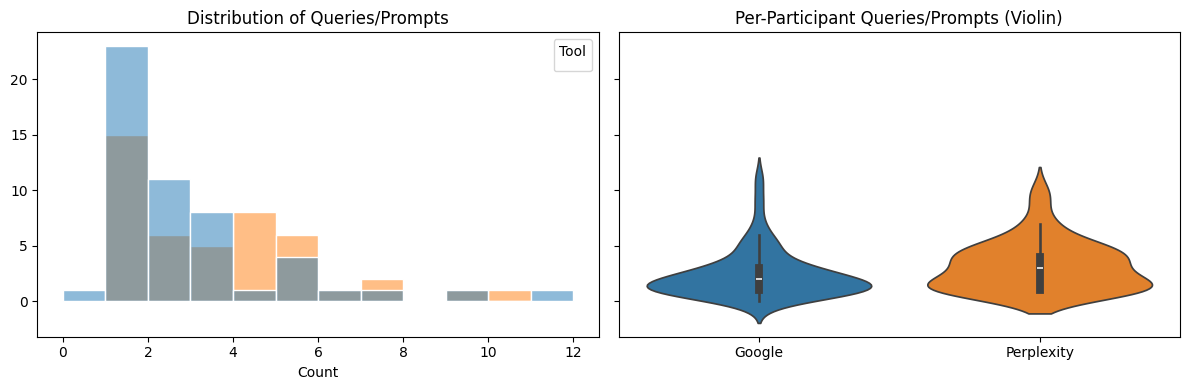

In [ ]:
# Distribution of per-participant query/prompt counts by condition
google_counts = (
    query_per_participant.reset_index(drop=True)
    .to_frame(name="count")
    .assign(tool="Google")
)

perplexity_counts = (
    prompts_per_participant[["prompt_count"]]
    .rename(columns={"prompt_count": "count"})
    .assign(tool="Perplexity")
)

counts_df = (
    pd.concat([google_counts, perplexity_counts], ignore_index=True)
    .dropna(subset=["count"])
    .assign(count=lambda d: d["count"].astype(int))
)

fig, axes = plt.subplots(1, 2, figsize=(12, 4), sharey=True)

max_count = counts_df["count"].max()
bins = np.arange(0, max_count + 2)

sns.histplot(
    data=counts_df,
    x="count",
    hue="tool",
    multiple="layer",
    bins=bins,
    edgecolor="white",
    palette=["#1f77b4", "#ff7f0e"],
    ax=axes[0],
)
axes[0].set_title("Distribution of Queries/Prompts")
axes[0].set_xlabel("Count")
axes[0].set_ylabel("")
axes[0].legend(title="Tool")

sns.violinplot(
    data=counts_df,
    x="tool",
    y="count",
    inner="box",
    palette=["#1f77b4", "#ff7f0e"],
    ax=axes[1],
)
axes[1].set_title("Per-Participant Queries/Prompts (Violin)")
axes[1].set_xlabel("")
axes[1].set_ylabel("Count")

plt.tight_layout()
plt.show()

### 2.3 Number of clicks per participant

In [ ]:
if "total_clicked_results_count" not in df_gg_search_session_filtered.columns:
    raise KeyError("Column 'total_clicked_results_count' not found in df_gg_search_session_filtered.")

gg_clicks_per_participant = df_gg_search_session_filtered["total_clicked_results_count"].dropna()

gg_clicks_per_participant.describe()

count    52.000000
mean      2.000000
std       2.581989
min       0.000000
25%       0.750000
50%       1.000000
75%       2.000000
max      15.000000
Name: total_clicked_results_count, dtype: float64

In [ ]:
required_cols = ["participant_id", "clicked_at"]
missing_cols = [col for col in required_cols if col not in df_chat_search_filtered.columns]
if missing_cols:
    raise KeyError(f"Missing expected column(s): {missing_cols}")

df_chat_click_events = df_chat_search_filtered[required_cols].copy()

chat_clicks_per_participant = (
    df_chat_click_events
    .dropna(subset=["participant_id", "clicked_at"])
    .groupby("participant_id", as_index=False)
    .agg(click_count=("clicked_at", "count"))
    .sort_values("click_count", ascending=False)
    .reset_index(drop=True)
)

chat_clicks_per_participant = chat_clicks_per_participant[["click_count"]]
chat_clicks_per_participant.head()

,click_count
0,6
1,3
2,2
3,2
4,2


In [ ]:
# =====================================================
# 1. PREPARE DATA
# =====================================================

# --- Google condition ---
gg = (
    gg_clicks_per_participant
    .reset_index(drop=True)
    .to_frame(name="clicks")
)
gg["condition"] = 0   # 0 = Google

# --- Perplexity condition ---
px = (
    chat_clicks_per_participant["click_count"]
    .reset_index(drop=True)
    .to_frame(name="clicks")
)
px["condition"] = 1   # 1 = Perplexity

# --- Combine ---
df = pd.concat([gg, px], ignore_index=True)

# =====================================================
# 2. CLEANING (OPTIONAL)
# =====================================================
# remove impossible values
#df = df[df["clicks"] >= 0]

# remove extreme outliers (optional but recommended)
# df = df[df["clicks"] < df["clicks"].quantile(0.995)]

# =====================================================
# 3. LOG TRANSFORM (recommended for count variables)
# =====================================================
df["log_clicks"] = np.log(df["clicks"] + 1)   # +1 avoids log(0)

# =====================================================
# 4. RUN REGRESSION (OLS with robust HC3 errors)
# =====================================================
model = smf.ols("log_clicks ~ condition", data=df).fit(cov_type="HC3")
print(model.summary())

# =====================================================
# 5. INTERPRET IN % TERMS
# =====================================================
beta1 = model.params["condition"]
percent_diff = (np.exp(beta1) - 1) * 100

print(f"\nPerplexity vs Google: {percent_diff:.2f}% difference in number of clicks")

                            OLS Regression Results                            
Dep. Variable:             log_clicks   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                 -0.013
Method:                 Least Squares   F-statistic:                    0.3248
Date:                 Mi, 03 Dez 2025   Prob (F-statistic):              0.571
Time:                        11:49:42   Log-Likelihood:                -61.951
No. Observations:                  67   AIC:                             127.9
Df Residuals:                      65   BIC:                             132.3
Df Model:                           1                                         
Covariance Type:                  HC3                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.8538      0.094      9.065      0.0

Results of the Analysis: 
1. We regressed log-transformed click counts (log(clicks + 1)) on a binary tool indicator (0 = Google, 1 = Perplexity). The effect of tool condition was small and not statistically significant (b = 0.08, SE = 0.14, z = 0.57, p = .57, R² = .00). Back-transforming the coefficient corresponds to an estimated 8% higher click count in the Perplexity condition, but the 95% confidence interval includes both negative and positive effects, indicating no reliable difference in the number of clicks per participant between Google and Perplexity.
2. 

In [ ]:
click_summary = pd.DataFrame(
    [
        {
            "tool": "Google",
            "avg_clicks": gg_clicks_per_participant.mean(),
            "min_clicks": gg_clicks_per_participant.min(),
            "max_clicks": gg_clicks_per_participant.max(),
        },
        {
            "tool": "Perplexity",
            "avg_clicks": chat_clicks_per_participant["click_count"].mean(),
            "min_clicks": chat_clicks_per_participant["click_count"].min(),
            "max_clicks": chat_clicks_per_participant["click_count"].max(),
        },
    ]
).set_index("tool")

display(click_summary.round(2))

,avg_clicks,min_clicks,max_clicks
tool,,,
Google,2.00,0,15
Perplexity,1.73,1,6


In [ ]:
clicks_df = (
    pd.concat(
        [
            gg_clicks_per_participant.reset_index(drop=True).to_frame(name="clicks").assign(tool="Google"),
            chat_clicks_per_participant.rename(columns={"click_count": "clicks"}).assign(tool="Perplexity"),
        ],
        ignore_index=True,
    )
    .dropna(subset=["clicks"])
    .assign(clicks=lambda d: d["clicks"].astype(int))
)

fig, axes = plt.subplots(1, 2, figsize=(12, 4), sharey=True)

sns.histplot(
    data=clicks_df,
    x="clicks",
    hue="tool",
    multiple="layer",
    bins=np.arange(0, clicks_df["clicks"].max() + 2),
    edgecolor="white",
    palette=["#1f77b4", "#ff7f0e"],
    ax=axes[0],
)
axes[0].set_title("Histogram of Click Counts by Tool")
axes[0].set_xlabel("Clicks per participant")
axes[0].set_ylabel("Frequency")

sns.violinplot(
    data=clicks_df,
    x="tool",
    y="clicks",
    inner="quart",
    palette=["#1f77b4", "#ff7f0e"],
    ax=axes[1],
)
axes[1].set_title("Click Count Distribution by Tool")
axes[1].set_xlabel("")
axes[1].set_ylabel("Clicks")

plt.tight_layout()
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_21184\367205681.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


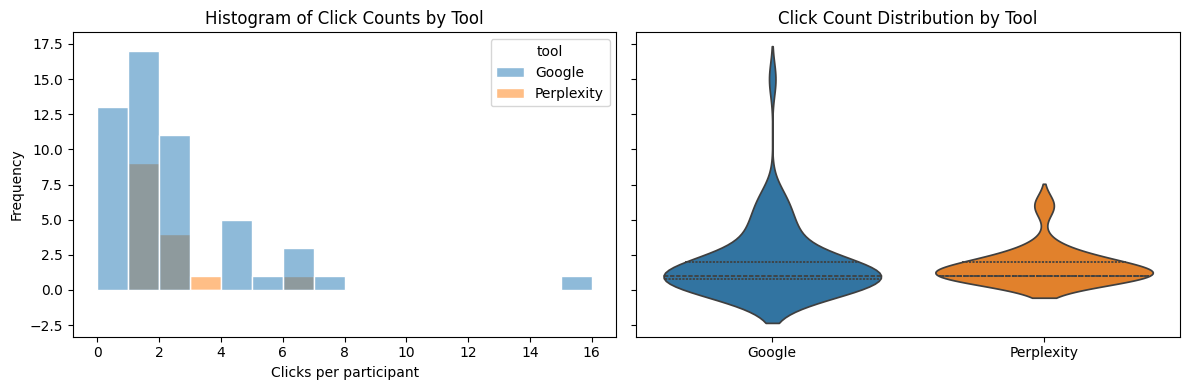

In [ ]:
clicks_df = (
    pd.concat(
        [
            gg_clicks_per_participant.reset_index(drop=True).to_frame(name="clicks").assign(tool="Google"),
            chat_clicks_per_participant.rename(columns={"click_count": "clicks"}).assign(tool="Perplexity"),
        ],
        ignore_index=True,
    )
    .dropna(subset=["clicks"])
    .assign(clicks=lambda d: d["clicks"].astype(int))
)

fig, axes = plt.subplots(1, 2, figsize=(12, 4), sharey=True)

sns.histplot(
    data=clicks_df,
    x="clicks",
    hue="tool",
    multiple="layer",
    bins=np.arange(0, clicks_df["clicks"].max() + 2),
    edgecolor="white",
    palette=["#1f77b4", "#ff7f0e"],
    ax=axes[0],
)
axes[0].set_title("Histogram of Click Counts by Tool")
axes[0].set_xlabel("Clicks per participant")
axes[0].set_ylabel("Frequency")

sns.violinplot(
    data=clicks_df,
    x="tool",
    y="clicks",
    inner="quart",
    palette=["#1f77b4", "#ff7f0e"],
    ax=axes[1],
)
axes[1].set_title("Click Count Distribution by Tool")
axes[1].set_xlabel("")
axes[1].set_ylabel("Clicks")

plt.tight_layout()
plt.show()

## RQ4: Moderator Analysis 

### 3.1 Group 1: Price-sensitive participants (those who chose to 5-7 in Likert scale for questions 17)

In [ ]:
gg_price_participants = df_gg_price[["participant_id"]].dropna().reset_index(drop=True)
print(f"Price-sensitive Google participants: {gg_price_participants.shape[0]}")
gg_price_participants.head()

Price-sensitive Google participants: 23


,participant_id
0,1f0df1be-a1ea-4080-90c3-230fe9e35174
1,2d8dd1db-9d38-49e0-bf03-5b4735523d27
2,2e912156-c7b7-4268-8420-128a859c4876
3,3409f5be-93f2-44f4-8edb-910e95126257
4,3beee5db-499b-4741-b3ea-72c6f17ffb86


In [ ]:
q17_column = q17_chat_col if "q17_chat_col" in globals() else [
    c for c in df_chat_surveys.columns if "q17" in c.lower() or "question17" in c.lower()
][0]

chat_price_participants = (
    df_chat_surveys.loc[df_chat_surveys[q17_column].between(5, 7), ["participant_id"]]
    .dropna(subset=["participant_id"])
    .reset_index(drop=True)
)

print(f"Price-sensitive chat participants: {len(chat_price_participants)}")
chat_price_participants.head()

Price-sensitive chat participants: 22


,participant_id
0,151939c4-8aae-490b-92eb-c7d353a4a95c
1,e2f70344-8588-468c-9dc2-8c2993f5b6c9
2,f668df6c-a949-40d0-8ff9-840a65e676a2
3,76ca052a-413b-426f-bf8e-5bc80d00c05a
4,eb2efe5b-53d6-4751-9ba5-2004d1234e28


In [ ]:
# -------------------------------------------------------
# 2.1 Search Time (price-sensitive participants only)
# -------------------------------------------------------
gg_price_ids = set(gg_price_participants["participant_id"])
px_price_ids = set(chat_price_participants["participant_id"])

google_price_time = (
    df_gg_search_session_filtered.loc[
        df_gg_search_session_filtered["participant_id"].isin(gg_price_ids),
        ["participant_id", "session_duration_ms"]
    ]
    .assign(
        session_duration_ms=lambda d: pd.to_numeric(d["session_duration_ms"], errors="coerce"),
        condition=0
    )
    .dropna(subset=["session_duration_ms"])
)

perplexity_price_time = (
    df_chat_sessions_latest.loc[
        df_chat_sessions_latest["participant_id"].isin(px_price_ids),
        ["participant_id", "session_duration_ms"]
    ]
    .assign(
        session_duration_ms=lambda d: pd.to_numeric(d["session_duration_ms"], errors="coerce"),
        condition=1
    )
    .dropna(subset=["session_duration_ms"])
)

df_price_time = pd.concat([google_price_time, perplexity_price_time], ignore_index=True)

if df_price_time.empty:
    raise ValueError("No search-time data available for the specified price-sensitive participants.")

df_price_time = df_price_time[df_price_time["session_duration_ms"] > 0]
df_price_time["time_sec"] = df_price_time["session_duration_ms"] / 1000
df_price_time["log_time"] = np.log(df_price_time["time_sec"])

print(
    f"Google n={len(google_price_time)}, "
    f"Perplexity n={len(perplexity_price_time)}, "
    f"Combined n={len(df_price_time)}"
)

price_model = smf.ols("log_time ~ condition", data=df_price_time).fit(cov_type="HC3")
print(price_model.summary())

beta_condition = price_model.params["condition"]
percent_diff_price = (np.exp(beta_condition) - 1) * 100
print(f"\nPerplexity vs Google (price-sensitive): {percent_diff_price:.2f}% difference in search time")

Google n=23, Perplexity n=22, Combined n=45
                            OLS Regression Results                            
Dep. Variable:               log_time   R-squared:                       0.115
Model:                            OLS   Adj. R-squared:                  0.095
Method:                 Least Squares   F-statistic:                     5.212
Date:                 Mi, 03 Dez 2025   Prob (F-statistic):             0.0274
Time:                        11:49:43   Log-Likelihood:                -75.757
No. Observations:                  45   AIC:                             155.5
Df Residuals:                      43   BIC:                             159.1
Df Model:                           1                                         
Covariance Type:                  HC3                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercep

In [ ]:
# -------------------------------------------------------
# 2.2 Queries / Prompts (price-sensitive participants only)
# -------------------------------------------------------
if not gg_price_ids or not px_price_ids:
    raise ValueError("Price-sensitive participant sets are empty. Verify q17 filtering.")

google_price_queries = (
    df_gg_search_session_filtered.loc[
        df_gg_search_session_filtered["participant_id"].isin(gg_price_ids),
        ["participant_id", "query_count"]
    ]
    .assign(query_count=lambda d: pd.to_numeric(d["query_count"], errors="coerce"))
    .dropna(subset=["query_count"])
    .groupby("participant_id", as_index=False)["query_count"]
    .mean()
    .rename(columns={"query_count": "count"})
)
google_price_queries["condition"] = 0

perplexity_price_prompts = (
    prompts_per_participant.loc[
        prompts_per_participant["participant_id"].isin(px_price_ids),
        ["participant_id", "prompt_count"]
    ]
    .rename(columns={"prompt_count": "count"})
)
perplexity_price_prompts["condition"] = 1

df_price_queries = pd.concat([google_price_queries, perplexity_price_prompts], ignore_index=True)
df_price_queries = df_price_queries[df_price_queries["count"] >= 0]

if df_price_queries.empty:
    raise ValueError("No query/prompt data available for price-sensitive participants.")

df_price_queries["log_count"] = np.log(df_price_queries["count"] + 1)

price_query_model = smf.ols("log_count ~ condition", data=df_price_queries).fit(cov_type="HC3")
print(price_query_model.summary())

beta_condition = price_query_model.params["condition"]
percent_diff_price_queries = (np.exp(beta_condition) - 1) * 100
print(f"\nPerplexity vs Google (price-sensitive): {percent_diff_price_queries:.2f}% difference in queries/prompts")

                            OLS Regression Results                            
Dep. Variable:              log_count   R-squared:                       0.050
Model:                            OLS   Adj. R-squared:                  0.028
Method:                 Least Squares   F-statistic:                     2.133
Date:                 Mi, 03 Dez 2025   Prob (F-statistic):              0.151
Time:                        11:49:43   Log-Likelihood:                -26.203
No. Observations:                  45   AIC:                             56.41
Df Residuals:                      43   BIC:                             60.02
Df Model:                           1                                         
Covariance Type:                  HC3                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.0013      0.084     11.982      0.0

In [ ]:
# -------------------------------------------------------
# 2.3 Number of clicks per participant (price-sensitive)
# -------------------------------------------------------
if not gg_price_ids or not px_price_ids:
    raise ValueError("Price-sensitive participant sets are empty. Verify q17 filtering.")

google_price_clicks = (
    df_gg_search_session_filtered.loc[
        df_gg_search_session_filtered["participant_id"].isin(gg_price_ids),
        ["participant_id", "total_clicked_results_count"]
    ]
    .dropna(subset=["total_clicked_results_count"])
    .rename(columns={"total_clicked_results_count": "clicks"})
)
google_price_clicks["condition"] = 0

perplexity_price_clicks = (
    df_chat_click_events.loc[
        df_chat_click_events["participant_id"].isin(px_price_ids),
        ["participant_id", "clicked_at"]
    ]
    .groupby("participant_id", as_index=False)
    .agg(clicks=("clicked_at", "count"))
)
perplexity_price_clicks["condition"] = 1

df_price_clicks = pd.concat(
    [google_price_clicks, perplexity_price_clicks],
    ignore_index=True
)
df_price_clicks = df_price_clicks[df_price_clicks["clicks"] >= 0]

if df_price_clicks.empty:
    raise ValueError("No click data available for price-sensitive participants.")

df_price_clicks["log_clicks"] = np.log(df_price_clicks["clicks"] + 1)

price_click_model = smf.ols("log_clicks ~ condition", data=df_price_clicks).fit(cov_type="HC3")
print(price_click_model.summary())

beta_condition = price_click_model.params["condition"]
percent_diff_price_clicks = (np.exp(beta_condition) - 1) * 100
print(f"\nPerplexity vs Google (price-sensitive): {percent_diff_price_clicks:.2f}% difference in clicks")

                            OLS Regression Results                            
Dep. Variable:             log_clicks   R-squared:                       0.126
Model:                            OLS   Adj. R-squared:                  0.106
Method:                 Least Squares   F-statistic:                     6.030
Date:                 Mi, 03 Dez 2025   Prob (F-statistic):             0.0182
Time:                        11:49:43   Log-Likelihood:                -38.455
No. Observations:                  45   AIC:                             80.91
Df Residuals:                      43   BIC:                             84.52
Df Model:                           1                                         
Covariance Type:                  HC3                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.7716      0.141      5.474      0.0

### 3.2 Group 2: Feature-sensitive participants (those who chose 1-3 in Likert scale for question 17)

In [ ]:
if q17_column not in df_gg_surveys.columns:
    raise KeyError(f"Column '{q17_column}' not found in df_gg_surveys.")

google_feature_participants = (
    df_gg_surveys.loc[df_gg_surveys[q17_column].between(1, 3), ["participant_id", q17_column]]
    .dropna(subset=["participant_id"])
    .reset_index(drop=True)
)

print(
    f"Feature-sensitive Google participants (Likert 1–3 on {q17_column}): "
    f"{google_feature_participants.shape[0]}"
)
google_feature_participants

Feature-sensitive Google participants (Likert 1–3 on q17_price_importance): 11


,participant_id,q17_price_importance
0,09e6255b-ed66-4eea-a314-104a08130ac0,3
1,2afa9961-1844-49e8-80fc-444466532f46,3
2,403feef5-647d-4a34-a15a-c4bdc29fb2c2,3
3,5addaa61-1640-4204-b112-292aa59a9ae2,2
4,819b9a0d-1a04-421f-bc67-6629df6fe9d1,3
5,861bf96c-d651-4073-b365-7b9326bed46b,3
6,9b95cd3d-0a2c-4f0b-8a62-f19726ffedd0,1
7,c1f0ba55-5c73-4fea-9787-42583c2823aa,3
8,d6939226-3b6f-4d7b-99ab-d4c3c1db64e6,2
9,e98964ae-fbfd-42ee-9e6e-20b332d1a03d,3


In [ ]:
chat_feature_participants = (
    df_chat_surveys.loc[
        df_chat_surveys[q17_column].between(1, 3),
        ["participant_id", q17_column]
    ]
    .dropna(subset=["participant_id"])
    .sort_values("participant_id")
    .reset_index(drop=True)
)

print(
    f"Feature-sensitive Perplexity participants (Likert 1–3 on {q17_column}): "
    f"{chat_feature_participants.shape[0]}"
)
chat_feature_participants

Feature-sensitive Perplexity participants (Likert 1–3 on q17_price_importance): 10


,participant_id,q17_price_importance
0,0ba4f0a8-673f-4054-80e0-690aaf497b51,3
1,18b17697-3a40-4604-ba57-75c836a01401,3
2,21121fd2-00ef-4b2a-974f-823f26f3f7fd,2
3,25040da2-2cce-4925-9fbd-855669f4cb23,2
4,386be8d7-6771-4885-8745-e30399b113d0,3
5,5f62d87d-4912-454b-94d1-309c26c16b08,2
6,88584cfe-a550-4209-a1f3-be628bb2647b,3
7,b7a9b5f0-50fe-47ea-ac8a-f6ef1df7ba72,2
8,bb7758ff-4018-4589-9209-4c9d1cfb3556,3
9,fe4a79bb-642e-49d8-920a-a5f39035ffe3,3


In [ ]:
# Search time regression for feature-sensitive participants
gg_feature_ids = set(google_feature_participants["participant_id"])
px_feature_ids = set(chat_feature_participants["participant_id"])

if not gg_feature_ids or not px_feature_ids:
    raise ValueError("Feature-sensitive participant sets are empty. Verify q17 filtering.")

google_feature_time = (
    df_gg_search_session_filtered.loc[
        df_gg_search_session_filtered["participant_id"].isin(gg_feature_ids),
        ["participant_id", "session_duration_ms"]
    ]
    .assign(
        session_duration_ms=lambda d: pd.to_numeric(d["session_duration_ms"], errors="coerce"),
        condition=0
    )
    .dropna(subset=["session_duration_ms"])
)

perplexity_feature_time = (
    df_chat_sessions_latest.loc[
        df_chat_sessions_latest["participant_id"].isin(px_feature_ids),
        ["participant_id", "session_duration_ms"]
    ]
    .assign(
        session_duration_ms=lambda d: pd.to_numeric(d["session_duration_ms"], errors="coerce"),
        condition=1
    )
    .dropna(subset=["session_duration_ms"])
)

df_feature_time = pd.concat([google_feature_time, perplexity_feature_time], ignore_index=True)

if df_feature_time.empty:
    raise ValueError("No search-time data available for feature-sensitive participants.")

df_feature_time = df_feature_time[df_feature_time["session_duration_ms"] > 0].copy()
df_feature_time["time_sec"] = df_feature_time["session_duration_ms"] / 1000
df_feature_time["log_time"] = np.log(df_feature_time["time_sec"])

print(
    f"Google n={len(google_feature_time)}, "
    f"Perplexity n={len(perplexity_feature_time)}, "
    f"Combined n={len(df_feature_time)}"
)

feature_model = smf.ols("log_time ~ condition", data=df_feature_time).fit(cov_type="HC3")
print(feature_model.summary())

beta_condition = feature_model.params["condition"]
percent_diff_feature = (np.exp(beta_condition) - 1) * 100
print(f"\nPerplexity vs Google (feature-sensitive): {percent_diff_feature:.2f}% difference in search time")

Google n=11, Perplexity n=10, Combined n=21
                            OLS Regression Results                            
Dep. Variable:               log_time   R-squared:                       0.588
Model:                            OLS   Adj. R-squared:                  0.567
Method:                 Least Squares   F-statistic:                     23.42
Date:                 Mi, 03 Dez 2025   Prob (F-statistic):           0.000114
Time:                        11:49:43   Log-Likelihood:                -25.466
No. Observations:                  21   AIC:                             54.93
Df Residuals:                      19   BIC:                             57.02
Df Model:                           1                                         
Covariance Type:                  HC3                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercep

In [ ]:
# -------------------------------------------------------
# 2.2 Queries / Prompts (feature-sensitive participants)
# -------------------------------------------------------
if not gg_feature_ids or not px_feature_ids:
    raise ValueError("Feature-sensitive participant sets are empty. Verify q17 filtering.")

google_feature_queries = (
    df_gg_search_session_filtered.loc[
        df_gg_search_session_filtered["participant_id"].isin(gg_feature_ids),
        ["participant_id", "query_count"]
    ]
    .assign(query_count=lambda d: pd.to_numeric(d["query_count"], errors="coerce"))
    .dropna(subset=["query_count"])
    .groupby("participant_id", as_index=False)
    .agg(count=("query_count", "mean"))
)
google_feature_queries["condition"] = 0

perplexity_feature_prompts = (
    prompts_per_participant.loc[
        prompts_per_participant["participant_id"].isin(px_feature_ids),
        ["participant_id", "prompt_count"]
    ]
    .rename(columns={"prompt_count": "count"})
)
perplexity_feature_prompts["condition"] = 1

df_feature_queries = pd.concat(
    [google_feature_queries, perplexity_feature_prompts],
    ignore_index=True
)
df_feature_queries = df_feature_queries[df_feature_queries["count"] >= 0]

if df_feature_queries.empty:
    raise ValueError("No query/prompt data available for feature-sensitive participants.")

df_feature_queries["log_count"] = np.log(df_feature_queries["count"] + 1)

feature_query_model = smf.ols("log_count ~ condition", data=df_feature_queries).fit(cov_type="HC3")
print(feature_query_model.summary())

beta_condition = feature_query_model.params["condition"]
percent_diff_feature_queries = (np.exp(beta_condition) - 1) * 100
print(f"\nPerplexity vs Google (feature-sensitive): {percent_diff_feature_queries:.2f}% difference in queries/prompts")

                            OLS Regression Results                            
Dep. Variable:              log_count   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                 -0.036
Method:                 Least Squares   F-statistic:                    0.2811
Date:                 Mi, 03 Dez 2025   Prob (F-statistic):              0.602
Time:                        11:49:43   Log-Likelihood:                -18.239
No. Observations:                  21   AIC:                             40.48
Df Residuals:                      19   BIC:                             42.57
Df Model:                           1                                         
Covariance Type:                  HC3                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.4910      0.206      7.225      0.0

In [ ]:
# -------------------------------------------------------
# 2.3 Number of clicks per participant (feature-sensitive)
# -------------------------------------------------------
if not gg_feature_ids or not px_feature_ids:
    raise ValueError("Feature-sensitive participant sets are empty. Verify q17 filtering.")

google_feature_clicks = (
    df_gg_search_session_filtered.loc[
        df_gg_search_session_filtered["participant_id"].isin(gg_feature_ids),
        ["participant_id", "total_clicked_results_count"]
    ]
    .dropna(subset=["total_clicked_results_count"])
    .rename(columns={"total_clicked_results_count": "clicks"})
)
google_feature_clicks["condition"] = 0

perplexity_feature_clicks = (
    df_chat_click_events.loc[
        df_chat_click_events["participant_id"].isin(px_feature_ids),
        ["participant_id", "clicked_at"]
    ]
    .groupby("participant_id", as_index=False)
    .agg(clicks=("clicked_at", "count"))
)
perplexity_feature_clicks["condition"] = 1

df_feature_clicks = pd.concat(
    [google_feature_clicks, perplexity_feature_clicks],
    ignore_index=True
)
df_feature_clicks = df_feature_clicks[df_feature_clicks["clicks"] >= 0]

if df_feature_clicks.empty:
    raise ValueError("No click data available for feature-sensitive participants.")

df_feature_clicks["log_clicks"] = np.log(df_feature_clicks["clicks"] + 1)

feature_click_model = smf.ols("log_clicks ~ condition", data=df_feature_clicks).fit(cov_type="HC3")
print(feature_click_model.summary())

beta_condition = feature_click_model.params["condition"]
percent_diff_feature_clicks = (np.exp(beta_condition) - 1) * 100
print(f"\nPerplexity vs Google (feature-sensitive): {percent_diff_feature_clicks:.2f}% difference in clicks")

                            OLS Regression Results                            
Dep. Variable:             log_clicks   R-squared:                       0.309
Model:                            OLS   Adj. R-squared:                  0.273
Method:                 Least Squares   F-statistic:                     7.747
Date:                 Mi, 03 Dez 2025   Prob (F-statistic):             0.0118
Time:                        11:49:44   Log-Likelihood:                -19.955
No. Observations:                  21   AIC:                             43.91
Df Residuals:                      19   BIC:                             46.00
Df Model:                           1                                         
Covariance Type:                  HC3                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.2408      0.215      5.775      0.0

### Group 3: Age Subgroup Analysis

In [ ]:
age_col = px_age_col if "px_age_col" in globals() else "q1_age_group"

if age_col not in df_gg_surveys.columns or age_col not in df_chat_surveys.columns:
    raise KeyError(f"Column '{age_col}' must exist in both survey dataframes.")

google_age_time = (
    df_gg_search_session_filtered.merge(
        df_gg_surveys[["participant_id", age_col]],
        on="participant_id",
        how="inner"
    )
    .assign(
        session_duration_ms=lambda d: pd.to_numeric(d["session_duration_ms"], errors="coerce"),
        condition=0
    )
    .dropna(subset=["session_duration_ms", age_col])
)

perplexity_age_time = (
    df_chat_sessions_latest.merge(
        df_chat_surveys[["participant_id", age_col]],
        on="participant_id",
        how="inner"
    )
    .assign(
        session_duration_ms=lambda d: pd.to_numeric(d["session_duration_ms"], errors="coerce"),
        condition=1
    )
    .dropna(subset=["session_duration_ms", age_col])
)

df_age_time = (
    pd.concat([google_age_time, perplexity_age_time], ignore_index=True)
    .query("session_duration_ms > 0")
    .assign(
        time_sec=lambda d: d["session_duration_ms"] / 1000,
        log_time=lambda d: np.log(d["session_duration_ms"] / 1000)
    )
)

age_group_models = {}
age_group_results = []

for age_group, subset in df_age_time.groupby(age_col):
    if subset["condition"].nunique() < 2:
        continue

    model = smf.ols("log_time ~ condition", data=subset).fit(cov_type="HC3")
    beta = model.params["condition"]

    age_group_models[age_group] = model
    age_group_results.append(
        {
            age_col: age_group,
            "n_google": int((subset["condition"] == 0).sum()),
            "n_perplexity": int((subset["condition"] == 1).sum()),
            "beta_condition": beta,
            "p_value": model.pvalues["condition"],
            "percent_diff": (np.exp(beta) - 1) * 100,
        }
    )

age_group_results = (
    pd.DataFrame(age_group_results)
    .sort_values(by=age_col)
    .reset_index(drop=True)
)

print(f"Combined search-time rows after filtering: {df_age_time.shape[0]}")
age_group_results

Combined search-time rows after filtering: 96


,q1_age_group,n_google,n_perplexity,beta_condition,p_value,percent_diff
0,18-24,19,24,-1.139091,0.001828,-67.989015
1,25-34,19,13,-0.753151,0.098135,-52.911939
2,35-44,7,5,-1.702619,0.000656,-81.779430
3,Under 18,4,1,-2.559307,0.139872,-92.264165


In [ ]:
# -------------------------------------------------------
# Queries / prompts by age group (Google vs Perplexity)
# -------------------------------------------------------
age_col = age_col if "age_col" in globals() else "q1_age_group"

google_age_queries = (
    df_gg_search_session_filtered
    .dropna(subset=["participant_id", "query_count"])
    .assign(query_count=lambda d: pd.to_numeric(d["query_count"], errors="coerce"))
    .groupby("participant_id", as_index=False)["query_count"]
    .sum()
    .merge(df_gg_surveys[["participant_id", age_col]], on="participant_id", how="inner")
    .rename(columns={"query_count": "count"})
    .assign(condition=0)
)

perplexity_age_prompts = (
    prompts_per_participant
    .rename(columns={"prompt_count": "count"})
    .merge(df_chat_surveys[["participant_id", age_col]], on="participant_id", how="inner")
    .assign(condition=1)
)

df_age_queries = (
    pd.concat([google_age_queries, perplexity_age_prompts], ignore_index=True)
    .dropna(subset=["count", age_col])
)

df_age_queries["count"] = pd.to_numeric(df_age_queries["count"], errors="coerce")
df_age_queries = df_age_queries[df_age_queries["count"] >= 0].copy()
df_age_queries["log_count"] = np.log(df_age_queries["count"] + 1)

age_query_results = []
age_query_models = {}

for age_group, subset in df_age_queries.groupby(age_col):
    if subset["condition"].nunique() < 2:
        continue
    model = smf.ols("log_count ~ condition", data=subset).fit(cov_type="HC3")
    beta = model.params["condition"]
    age_query_models[age_group] = model
    age_query_results.append(
        {
            age_col: age_group,
            "n_google": int((subset["condition"] == 0).sum()),
            "n_perplexity": int((subset["condition"] == 1).sum()),
            "beta_condition": beta,
            "p_value": model.pvalues["condition"],
            "percent_diff": (np.exp(beta) - 1) * 100,
        }
    )

age_query_results = (
    pd.DataFrame(age_query_results)
    .sort_values(by=age_col)
    .reset_index(drop=True)
)

print(f"Eligible rows for age-based query analysis: {df_age_queries.shape[0]}")
age_query_results


Eligible rows for age-based query analysis: 97


,q1_age_group,n_google,n_perplexity,beta_condition,p_value,percent_diff
0,18-24,19,24,0.137909,0.402018,14.787058
1,25-34,19,14,0.319734,0.064308,37.676191
2,35-44,7,5,-0.006141,0.986438,-0.612252
3,Under 18,4,1,0.722593,0.540768,105.976714


In [ ]:
# Number of clicks by age group (Google vs Perplexity)
age_col = age_col if "age_col" in globals() else "q1_age_group"

google_age_clicks = (
    df_gg_search_session_filtered
    .dropna(subset=["participant_id", "total_clicked_results_count"])
    .groupby("participant_id", as_index=False)["total_clicked_results_count"]
    .sum()
    .rename(columns={"total_clicked_results_count": "clicks"})
    .merge(df_gg_surveys[["participant_id", age_col]], on="participant_id", how="inner")
    .assign(condition=0)
)

perplexity_age_clicks = (
    df_chat_click_events
    .dropna(subset=["participant_id"])
    .groupby("participant_id", as_index=False)
    .agg(clicks=("clicked_at", "count"))
    .merge(df_chat_surveys[["participant_id", age_col]], on="participant_id", how="inner")
    .assign(condition=1)
)

df_age_clicks = (
    pd.concat([google_age_clicks, perplexity_age_clicks], ignore_index=True)
    .dropna(subset=["clicks", age_col])
    .assign(clicks=lambda d: pd.to_numeric(d["clicks"], errors="coerce"))
)
df_age_clicks = df_age_clicks[df_age_clicks["clicks"] >= 0].copy()
df_age_clicks["log_clicks"] = np.log(df_age_clicks["clicks"] + 1)

age_click_models = {}
age_click_results = []

for age_group, group_df in df_age_clicks.groupby(age_col):
    if group_df["condition"].nunique() < 2:
        continue
    model = smf.ols("log_clicks ~ condition", data=group_df).fit(cov_type="HC3")
    age_click_models[age_group] = model

    beta = model.params["condition"]
    age_click_results.append(
        {
            age_col: age_group,
            "n_google": int((group_df["condition"] == 0).sum()),
            "n_perplexity": int((group_df["condition"] == 1).sum()),
            "google_mean_clicks": group_df.loc[group_df["condition"] == 0, "clicks"].mean(),
            "perplexity_mean_clicks": group_df.loc[group_df["condition"] == 1, "clicks"].mean(),
            "beta_condition": beta,
            "p_value": model.pvalues["condition"],
            "percent_diff": (np.exp(beta) - 1) * 100,
        }
    )

age_click_summary = (
    pd.DataFrame(age_click_results)
    .sort_values(by=age_col)
    .reset_index(drop=True)
)

print(f"Eligible rows for age-based click analysis: {df_age_clicks.shape[0]}")
age_click_summary

Eligible rows for age-based click analysis: 97



,q1_age_group,n_google,n_perplexity,google_mean_clicks,perplexity_mean_clicks,beta_condition,p_value,percent_diff
0,18-24,19,24,2.315789,0.666667,-0.738673,0.000027,-52.225257
1,25-34,19,14,2.000000,0.500000,-0.456408,0.033346,-36.644487
2,35-44,7,5,1.857143,0.400000,-0.447766,0.251666,-36.094577
3,Under 18,4,1,1.250000,1.000000,0.117501,0.870618,12.468265


### Group 4: Gender Subgroup Analysis

In [ ]:
gender_col = "q2_gender"
if gender_col not in df_gg_surveys.columns or gender_col not in df_chat_surveys.columns:
    raise KeyError(f"{gender_col} must exist in both survey dataframes.")

google_gender_time = (
    df_gg_search_session_filtered.merge(
        df_gg_surveys[["participant_id", gender_col]],
        on="participant_id",
        how="inner"
    )
    .assign(
        session_duration_ms=lambda d: pd.to_numeric(d["session_duration_ms"], errors="coerce"),
        condition=0
    )
    .dropna(subset=["session_duration_ms", gender_col])
)

perplexity_gender_time = (
    df_chat_sessions_latest.merge(
        df_chat_surveys[["participant_id", gender_col]],
        on="participant_id",
        how="inner"
    )
    .assign(
        session_duration_ms=lambda d: pd.to_numeric(d["session_duration_ms"], errors="coerce"),
        condition=1
    )
    .dropna(subset=["session_duration_ms", gender_col])
)

df_gender_time = (
    pd.concat([google_gender_time, perplexity_gender_time], ignore_index=True)
    .query("session_duration_ms > 0")
    .assign(
        time_sec=lambda d: d["session_duration_ms"] / 1000,
        log_time=lambda d: np.log(d["session_duration_ms"] / 1000)
    )
)

gender_results = []
gender_models = {}

for gender, subset in df_gender_time.groupby(gender_col):
    if subset["condition"].nunique() < 2:
        continue

    model = smf.ols("log_time ~ condition", data=subset).fit(cov_type="HC3")
    beta = model.params["condition"]

    gender_models[gender] = model
    gender_results.append(
        {
            gender_col: gender,
            "n_google": int((subset["condition"] == 0).sum()),
            "n_perplexity": int((subset["condition"] == 1).sum()),
            "google_mean_sec": subset.loc[subset["condition"] == 0, "time_sec"].mean(),
            "perplexity_mean_sec": subset.loc[subset["condition"] == 1, "time_sec"].mean(),
            "beta_condition": beta,
            "p_value": model.pvalues["condition"],
            "percent_diff": (np.exp(beta) - 1) * 100,
        }
    )

gender_summary = (
    pd.DataFrame(gender_results)
    .sort_values(by=gender_col)
    .reset_index(drop=True)
)

print(f"Eligible rows for gender-based search-time analysis: {df_gender_time.shape[0]}")
gender_summary

Eligible rows for gender-based search-time analysis: 96


,q2_gender,n_google,n_perplexity,google_mean_sec,perplexity_mean_sec,beta_condition,p_value,percent_diff
0,Female,35,21,292.614886,119.472333,-1.323635,0.000064,-73.383398
1,Male,16,23,268.391750,219.294565,-0.910791,0.009007,-59.779387


In [ ]:
# -------------------------------------------------------
# Queries / prompts by gender (Google vs Perplexity)
# -------------------------------------------------------
gender_col = gender_col if "gender_col" in globals() else "q2_gender"

google_gender_queries = (
    df_gg_search_session_filtered
    .dropna(subset=["participant_id", "query_count"])
    .assign(query_count=lambda d: pd.to_numeric(d["query_count"], errors="coerce"))
    .groupby("participant_id", as_index=False)["query_count"]
    .sum()
    .merge(df_gg_surveys[["participant_id", gender_col]], on="participant_id", how="inner")
    .rename(columns={"query_count": "count"})
    .assign(condition=0)
)

perplexity_gender_prompts = (
    prompts_per_participant
    .rename(columns={"prompt_count": "count"})
    .merge(df_chat_surveys[["participant_id", gender_col]], on="participant_id", how="inner")
    .assign(condition=1)
)

df_gender_queries = (
    pd.concat([google_gender_queries, perplexity_gender_prompts], ignore_index=True)
    .dropna(subset=["count", gender_col])
)

df_gender_queries["count"] = pd.to_numeric(df_gender_queries["count"], errors="coerce")
df_gender_queries = df_gender_queries[df_gender_queries["count"] >= 0].copy()
df_gender_queries["log_count"] = np.log(df_gender_queries["count"] + 1)

gender_query_models = {}
gender_query_results = []

for gender, subset in df_gender_queries.groupby(gender_col):
    if subset["condition"].nunique() < 2:
        continue

    model = smf.ols("log_count ~ condition", data=subset).fit(cov_type="HC3")
    gender_query_models[gender] = model
    beta = model.params["condition"]

    gender_query_results.append(
        {
            gender_col: gender,
            "n_google": int((subset["condition"] == 0).sum()),
            "n_perplexity": int((subset["condition"] == 1).sum()),
            "google_mean_count": subset.loc[subset["condition"] == 0, "count"].mean(),
            "perplexity_mean_count": subset.loc[subset["condition"] == 1, "count"].mean(),
            "beta_condition": beta,
            "p_value": model.pvalues["condition"],
            "percent_diff": (np.exp(beta) - 1) * 100,
        }
    )

gender_query_summary = (
    pd.DataFrame(gender_query_results)
    .sort_values(by=gender_col)
    .reset_index(drop=True)
)

print(f"Eligible rows for gender-based query analysis: {df_gender_queries.shape[0]}")
gender_query_summary

Eligible rows for gender-based query analysis: 97



,q2_gender,n_google,n_perplexity,google_mean_count,perplexity_mean_count,beta_condition,p_value,percent_diff
0,Female,35,22,2.571429,3.363636,0.252341,0.077512,28.703471
1,Male,16,23,1.937500,3.000000,0.225885,0.132560,25.343169


In [ ]:
# Common gender regression on click counts
gender_col = gender_col if "gender_col" in globals() else "q2_gender"

google_gender_clicks = (
    df_gg_search_session_filtered
    .dropna(subset=["participant_id", "total_clicked_results_count"])
    .merge(df_gg_surveys[["participant_id", gender_col]], on="participant_id", how="inner")
    .rename(columns={"total_clicked_results_count": "clicks"})
    .assign(condition=0)
)

perplexity_gender_clicks = (
    df_chat_click_events
    .dropna(subset=["participant_id"])
    .groupby("participant_id", as_index=False)
    .agg(clicks=("clicked_at", "count"))
    .merge(df_chat_surveys[["participant_id", gender_col]], on="participant_id", how="inner")
    .assign(condition=1)
)

df_gender_clicks = (
    pd.concat([google_gender_clicks, perplexity_gender_clicks], ignore_index=True)
    .dropna(subset=["clicks", gender_col])
    .assign(
        clicks=lambda d: pd.to_numeric(d["clicks"], errors="coerce")
    )
)
df_gender_clicks = df_gender_clicks[df_gender_clicks["clicks"] >= 0].copy()
df_gender_clicks["log_clicks"] = np.log(df_gender_clicks["clicks"] + 1)

common_genders = (
    df_gender_clicks.groupby(gender_col)["condition"]
    .nunique()
    .loc[lambda s: s == 2]
    .index
)

gender_click_models = {}
gender_click_summary = []

for gender in common_genders:
    subset = df_gender_clicks[df_gender_clicks[gender_col] == gender]
    model = smf.ols("log_clicks ~ condition", data=subset).fit(cov_type="HC3")
    gender_click_models[gender] = model
    beta = model.params["condition"]
    gender_click_summary.append(
        {
            gender_col: gender,
            "n_google": int((subset["condition"] == 0).sum()),
            "n_perplexity": int((subset["condition"] == 1).sum()),
            "google_mean_clicks": subset.loc[subset["condition"] == 0, "clicks"].mean(),
            "perplexity_mean_clicks": subset.loc[subset["condition"] == 1, "clicks"].mean(),
            "beta_condition": beta,
            "p_value": model.pvalues["condition"],
            "percent_diff": (np.exp(beta) - 1) * 100,
        }
    )

gender_click_summary = (
    pd.DataFrame(gender_click_summary)
    .sort_values(by=gender_col)
    .reset_index(drop=True)
)

print(f"Eligible rows: {df_gender_clicks.shape[0]}")
gender_click_summary

Eligible rows: 97


,q2_gender,n_google,n_perplexity,google_mean_clicks,perplexity_mean_clicks,beta_condition,p_value,percent_diff
0,Female,35,22,1.971429,0.909091,-0.413563,0.019310,-33.87098
1,Male,16,23,1.250000,0.260870,-0.540996,0.000041,-41.78316


### Group 5: Employment Subgroup Analysis

In [ ]:
employment_col = "q4_employment"
missing_cols = [
    col
    for df_source in (df_gg_surveys, df_chat_surveys)
    for col in ([employment_col] if employment_col not in df_source.columns else [])
]
if missing_cols:
    raise KeyError(f"Missing employment column(s): {set(missing_cols)}")

# -------------------------------------------------------
# Search time by employment status
# -------------------------------------------------------
google_employment_time = (
    df_gg_search_session_filtered.merge(
        df_gg_surveys[["participant_id", employment_col]],
        on="participant_id",
        how="inner",
    )
    .assign(
        session_duration_ms=lambda d: pd.to_numeric(d["session_duration_ms"], errors="coerce"),
        condition=0,
    )
    .dropna(subset=["session_duration_ms", employment_col])
)

perplexity_employment_time = (
    df_chat_sessions_latest.merge(
        df_chat_surveys[["participant_id", employment_col]],
        on="participant_id",
        how="inner",
    )
    .assign(
        session_duration_ms=lambda d: pd.to_numeric(d["session_duration_ms"], errors="coerce"),
        condition=1,
    )
    .dropna(subset=["session_duration_ms", employment_col])
)

df_employment_time = (
    pd.concat([google_employment_time, perplexity_employment_time], ignore_index=True)
    .query("session_duration_ms > 0")
    .assign(
        time_sec=lambda d: d["session_duration_ms"] / 1000,
        log_time=lambda d: np.log(d["session_duration_ms"] / 1000),
    )
)

employment_time_summary = []
employment_time_models = {}

for employment, subset in df_employment_time.groupby(employment_col):
    if subset["condition"].nunique() < 2:
        continue
    model = smf.ols("log_time ~ condition", data=subset).fit(cov_type="HC3")
    employment_time_models[employment] = model
    beta = model.params["condition"]
    employment_time_summary.append(
        {
            employment_col: employment,
            "n_google": int((subset["condition"] == 0).sum()),
            "n_perplexity": int((subset["condition"] == 1).sum()),
            "google_mean_sec": subset.loc[subset["condition"] == 0, "time_sec"].mean(),
            "perplexity_mean_sec": subset.loc[subset["condition"] == 1, "time_sec"].mean(),
            "beta_condition": beta,
            "p_value": model.pvalues["condition"],
            "percent_diff": (np.exp(beta) - 1) * 100,
        }
    )

employment_time_summary = (
    pd.DataFrame(employment_time_summary).sort_values(employment_col).reset_index(drop=True)
)

print(f"Employment-based search-time rows: {df_employment_time.shape[0]}")
display(employment_time_summary)

# -------------------------------------------------------
# Queries / prompts by employment status
# -------------------------------------------------------
google_employment_queries = (
    df_gg_search_session_filtered.dropna(subset=["participant_id", "query_count"])
    .assign(query_count=lambda d: pd.to_numeric(d["query_count"], errors="coerce"))
    .groupby("participant_id", as_index=False)["query_count"]
    .sum()
    .merge(df_gg_surveys[["participant_id", employment_col]], on="participant_id", how="inner")
    .rename(columns={"query_count": "count"})
    .assign(condition=0)
)

perplexity_employment_prompts = (
    prompts_per_participant.rename(columns={"prompt_count": "count"})
    .merge(df_chat_surveys[["participant_id", employment_col]], on="participant_id", how="inner")
    .assign(condition=1)
)

df_employment_queries = (
    pd.concat([google_employment_queries, perplexity_employment_prompts], ignore_index=True)
    .dropna(subset=["count", employment_col])
    .assign(count=lambda d: pd.to_numeric(d["count"], errors="coerce"))
)
df_employment_queries = df_employment_queries[df_employment_queries["count"] >= 0].copy()
df_employment_queries["log_count"] = np.log(df_employment_queries["count"] + 1)

employment_query_summary = []
employment_query_models = {}

for employment, subset in df_employment_queries.groupby(employment_col):
    if subset["condition"].nunique() < 2:
        continue
    model = smf.ols("log_count ~ condition", data=subset).fit(cov_type="HC3")
    employment_query_models[employment] = model
    beta = model.params["condition"]
    employment_query_summary.append(
        {
            employment_col: employment,
            "n_google": int((subset["condition"] == 0).sum()),
            "n_perplexity": int((subset["condition"] == 1).sum()),
            "google_mean_count": subset.loc[subset["condition"] == 0, "count"].mean(),
            "perplexity_mean_count": subset.loc[subset["condition"] == 1, "count"].mean(),
            "beta_condition": beta,
            "p_value": model.pvalues["condition"],
            "percent_diff": (np.exp(beta) - 1) * 100,
        }
    )

employment_query_summary = (
    pd.DataFrame(employment_query_summary).sort_values(employment_col).reset_index(drop=True)
)

print(f"Employment-based query rows: {df_employment_queries.shape[0]}")
display(employment_query_summary)

# -------------------------------------------------------
# Clicks by employment status
# -------------------------------------------------------
google_employment_clicks = (
    df_gg_search_session_filtered.dropna(subset=["participant_id", "total_clicked_results_count"])
    .groupby("participant_id", as_index=False)["total_clicked_results_count"]
    .sum()
    .rename(columns={"total_clicked_results_count": "clicks"})
    .merge(df_gg_surveys[["participant_id", employment_col]], on="participant_id", how="inner")
    .assign(condition=0)
)

perplexity_employment_clicks = (
    df_chat_click_events.dropna(subset=["participant_id"])
    .groupby("participant_id", as_index=False)
    .agg(clicks=("clicked_at", "count"))
    .merge(df_chat_surveys[["participant_id", employment_col]], on="participant_id", how="inner")
    .assign(condition=1)
)

df_employment_clicks = (
    pd.concat([google_employment_clicks, perplexity_employment_clicks], ignore_index=True)
    .dropna(subset=["clicks", employment_col])
    .assign(clicks=lambda d: pd.to_numeric(d["clicks"], errors="coerce"))
)
df_employment_clicks = df_employment_clicks[df_employment_clicks["clicks"] >= 0].copy()
df_employment_clicks["log_clicks"] = np.log(df_employment_clicks["clicks"] + 1)

employment_click_summary = []
employment_click_models = {}

for employment, subset in df_employment_clicks.groupby(employment_col):
    if subset["condition"].nunique() < 2:
        continue
    model = smf.ols("log_clicks ~ condition", data=subset).fit(cov_type="HC3")
    employment_click_models[employment] = model
    beta = model.params["condition"]
    employment_click_summary.append(
        {
            employment_col: employment,
            "n_google": int((subset["condition"] == 0).sum()),
            "n_perplexity": int((subset["condition"] == 1).sum()),
            "google_mean_clicks": subset.loc[subset["condition"] == 0, "clicks"].mean(),
            "perplexity_mean_clicks": subset.loc[subset["condition"] == 1, "clicks"].mean(),
            "beta_condition": beta,
            "p_value": model.pvalues["condition"],
            "percent_diff": (np.exp(beta) - 1) * 100,
        }
    )

employment_click_summary = (
    pd.DataFrame(employment_click_summary).sort_values(employment_col).reset_index(drop=True)
)

print(f"Employment-based click rows: {df_employment_clicks.shape[0]}")
display(employment_click_summary)

Employment-based search-time rows: 96


,q4_employment,n_google,n_perplexity,google_mean_sec,perplexity_mean_sec,beta_condition,p_value,percent_diff
0,Employed,29,12,319.330310,108.267333,-1.221606,0.000700,-70.524368
1,Student,23,27,251.000565,207.788074,-1.053274,0.002134,-65.120613


Employment-based query rows: 97


,q4_employment,n_google,n_perplexity,google_mean_count,perplexity_mean_count,beta_condition,p_value,percent_diff
0,Employed,29,12,2.620690,3.750000,0.335939,0.078817,39.925310
1,Student,23,28,2.173913,3.107143,0.204824,0.120989,22.730913


Employment-based click rows: 97


,q4_employment,n_google,n_perplexity,google_mean_clicks,perplexity_mean_clicks,beta_condition,p_value,percent_diff
0,Employed,29,12,1.758621,0.750000,-0.465385,0.032251,-37.210691
1,Student,23,28,2.304348,0.464286,-0.639837,0.000199,-47.262177


## Question 42

In [37]:
google_answers_list = df_gg_surveys["q42_comments"]

In [38]:
formatted_comments = (
    df_gg_surveys.loc[:, ["participant_id", "q42_comments"]]
    .dropna(subset=["q42_comments"])
    .assign(q42_comments=lambda d: d["q42_comments"].astype(str).str.strip())
    .sort_values("participant_id")
)

for _, row in formatted_comments.iterrows():
    print(f"Participant {row['participant_id']}: {row['q42_comments']}")

Participant 09e6255b-ed66-4eea-a314-104a08130ac0: I liked the more minimal interface, and I liked going to vendor pages from links - I preferred this to a version of google which pulls out product information from websites, like google shopping. However, my sense was that I was getting very incomplete results.
Participant 15ef74b6-a61a-474c-b855-696b20ce58fb: Maybe
Participant 1f0df1be-a1ea-4080-90c3-230fe9e35174: Yes, it showed me relevant results for what I am looking for immediately, which was nice.
Participant 2afa9961-1844-49e8-80fc-444466532f46: Yes, the tool was transparent and easy to use, though I didn’t see any significant differences between the Google I’m used to and this tool.
Participant 2d8dd1db-9d38-49e0-bf03-5b4735523d27: No, AI didn’t show the classical bar abovd
Participant 2e912156-c7b7-4268-8420-128a859c4876: Yes, easy to use
Participant 3409f5be-93f2-44f4-8edb-910e95126257: Its easy to use
Participant 35f58cd5-b9a5-4132-a94d-8fcad2800a59: I don’t think so. It is n

In [39]:
perplexity_answers_list = df_chat_surveys["q42_comments"]

In [40]:
chat_formatted_comments = (
    df_chat_surveys.loc[:, ["participant_id", "q42_comments"]]
    .dropna(subset=["q42_comments"])
    .assign(q42_comments=lambda d: d["q42_comments"].astype(str).str.strip())
    .sort_values("participant_id")
)

for _, row in chat_formatted_comments.iterrows():
    print(f"Participant {row['participant_id']}: {row['q42_comments']}")

Participant 090b95b5-f52a-4e45-8665-1cc819388638: I am more familiar with chatgpt, one tool for all. I don't like having many tools
Participant 0ba4f0a8-673f-4054-80e0-690aaf497b51: No, it gives way too much information and doesn't make clear comparisons
Participant 0e8e279b-2364-4850-9f67-b682817f8378: Yes, it shows the resources from where it takes the information, that makes it easier if I want to confirm the answers I receive
Participant 145a5e3a-5d68-4457-9cc1-eaffd6662734: I wouldn’t because I like to find my sources on my own.
Participant 151939c4-8aae-490b-92eb-c7d353a4a95c: I might if the information is provided in a larger and wider window, and if the chatbox continues with the same set of phones it came up with since the first chat
Participant 157bcbd1-0270-41ee-af9a-4211ed21ea7c: yes.it was similar to other AI tools I use.
Participant 18b17697-3a40-4604-ba57-75c836a01401: I don't think so 
I didn't found it very practical and easy
Participant 193a0563-b869-4bbe-aa9e-d81bacf

In [47]:
# Setup (Load API Key from key.env)
from dotenv import load_dotenv
import os
import openai
import pandas as pd
import numpy as np

# Load key
load_dotenv("key.env")
openai.api_key = os.getenv("OPENAI_API_KEY")


In [52]:
# Example: Replace with your actual data loading
df_p = pd.DataFrame({"answer": perplexity_answers_list})
df_g = pd.DataFrame({"answer": google_answers_list})

# Add tool label
df_p["tool"] = "Perplexity"
df_g["tool"] = "Google"

df_all = pd.concat([df_p, df_g], ignore_index=True)
df_all = df_all.dropna(subset=["answer"])

### Sentiments of the answers

In [54]:
# Sentiment Classification Function
def classify_sentiment(text):
    text = (text or "").strip()
    if not text:
        return "Neutral"

    if not openai.api_key:
        lowered = text.lower()
        positive_cues = (
            "yes",
            "useful",
            "easy",
            "good",
            "helpful",
            "like",
            "love",
            "great",
            "clear",
        )
        negative_cues = (
            "no",
            "not",
            "slow",
            "bad",
            "confusing",
            "hard",
            "difficult",
            "worse",
            "unreliable",
        )

        pos_hits = sum(cue in lowered for cue in positive_cues)
        neg_hits = sum(cue in lowered for cue in negative_cues)

        if pos_hits > neg_hits:
            return "Positive"
        if neg_hits > pos_hits:
            return "Negative"
        return "Neutral"

    prompt = f"""
    Classify the sentiment about willingness to reuse the tool in this text as:
    Positive, Neutral, or Negative.
    Text: \"{text}\"
    Return only one word.
    """

    resp = openai.ChatCompletion.create(
        model="gpt-4o-mini",
        messages=[{"role": "user", "content": prompt}],
        max_tokens=5,
        temperature=0,
    )

    return resp.choices[0].message["content"].strip()

df_all["sentiment"] = df_all["answer"].apply(classify_sentiment)

Sentiment counts:


sentiment,Negative,Neutral,Positive
tool,,,
Google,22,8,20
Perplexity,15,12,17


Sentiment percentages (%):


sentiment,Negative,Neutral,Positive
tool,,,
Google,44.0,16.0,40.0
Perplexity,34.1,27.3,38.6


Chi-square = 1.99, df = 2, p-value = 0.3692


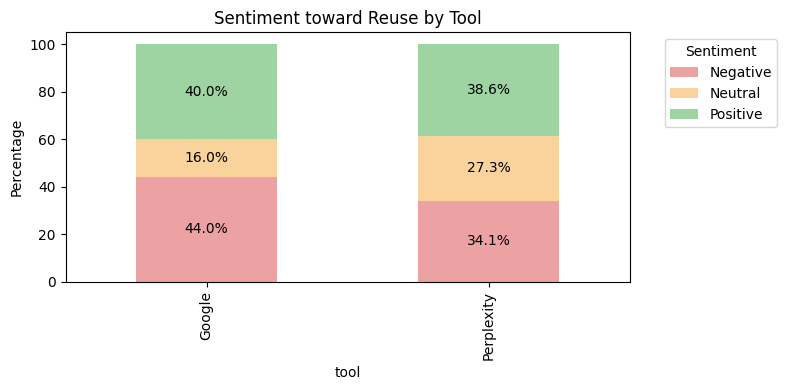

In [66]:
# Sentiment distribution by tool
sentiment_summary = (
    df_all.groupby(["tool", "sentiment"])
    .size()
    .unstack(fill_value=0)
    .reindex(["Google", "Perplexity"])
)

sentiment_percent = sentiment_summary.div(sentiment_summary.sum(axis=1), axis=0) * 100

print("Sentiment counts:")
display(sentiment_summary)

print("Sentiment percentages (%):")
display(sentiment_percent.round(1))

# Chi-square test for independence
chi2, p_value, dof, expected = stats.chi2_contingency(sentiment_summary)
print(f"Chi-square = {chi2:.2f}, df = {dof}, p-value = {p_value:.4f}")

# Stacked bar chart with lighter colors and percentage labels
light_colors = ["#eca1a3", "#f9d39b", "#9dd4a1"]  # Negative, Neutral, Positive

ax = sentiment_percent.plot(
    kind="bar",
    stacked=True,
    color=light_colors,
    figsize=(8, 4),
)

for idx, tool in enumerate(sentiment_percent.index):
    cumulative = 0
    for sentiment in sentiment_percent.columns:
        value = sentiment_percent.loc[tool, sentiment]
        if value <= 0:
            cumulative += value
            continue
        ax.text(
            idx,
            cumulative + value / 2,
            f"{value:.1f}%",
            ha="center",
            va="center",
            color="black",
            fontsize=10,
        )
        cumulative += value

plt.ylabel("Percentage")
plt.title("Sentiment toward Reuse by Tool")
plt.legend(title="Sentiment", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()


In [58]:
# Theme extraction ordered from positive → negative for Google vs Perplexity
themes_ordered = (
    df_themes.dropna(subset=["theme"])
    .groupby(["tool", "theme"], as_index=False)
    .agg(
        responses=("answer", "count"),
        avg_sentiment=("sentiment_score", "mean"),
        avg_theme_score=("theme_score", "mean"),
        example_comment=("answer", lambda s: s.iloc[0]),
    )
)

def ordered_themes(group):
    ordered = group.sort_values("avg_theme_score", ascending=False).reset_index(drop=True)
    ordered.insert(0, "rank", ordered.index + 1)
    cols = ["rank", "theme", "responses", "avg_sentiment", "avg_theme_score", "example_comment"]
    return ordered[cols]

theme_rankings = {
    tool: ordered_themes(group)
    for tool, group in themes_ordered.groupby("tool")
}

print("Perplexity: themes explaining willingness to reuse (positive → negative)")
display(theme_rankings.get("Perplexity"))

print("Google: themes explaining willingness to reuse (positive → negative)")
display(theme_rankings.get("Google"))

# Brief explanation of top reasons for and against reuse
for tool, ranking in theme_rankings.items():
    if ranking is None or ranking.empty:
        continue
    top_positive = ranking.iloc[0]
    top_negative = ranking.iloc[-1]
    print(
        f"{tool}: would use because '{top_positive['theme']}' "
        f"(e.g., {top_positive['example_comment']}); "
        f"would not use because '{top_negative['theme']}' "
        f"(e.g., {top_negative['example_comment']})."
    )

Perplexity: themes explaining willingness to reuse (positive → negative)


,rank,theme,responses,avg_sentiment,avg_theme_score,example_comment
0,1,Easy Use & Clarity,7,0.285714,0.531429,"Yes , I like it it gave clear answer and provi..."
1,2,Quick Comprehensive Answers,5,0.400000,0.520000,"No, the tool is unreliable, a google search is..."
2,3,Price & Specs Coverage,4,0.000000,0.120000,The system provides many accurate information ...
3,4,General Feedback,19,0.157895,0.094737,yea
4,5,Needs Cross-Checking,1,0.000000,-0.040000,I would try to but definitely compare the resu...
5,6,Depends on Task,3,-0.333333,-0.160000,"Yes, but I would use it only for a certain typ..."
6,7,Distrust & Inaccuracy,2,-0.500000,-0.620000,No. At least not for now. I asked to provide m...
7,8,Info Overload & Slow,2,-1.000000,-0.840000,it was a little slow
8,9,Would Not Reuse,1,-1.000000,-1.000000,Not really. The search results are largely Uni...


Google: themes explaining willingness to reuse (positive → negative)


,rank,theme,responses,avg_sentiment,avg_theme_score,example_comment
0,1,Easy Use & Clarity,12,0.916667,0.910000,"Yes, the tool was transparent and easy to use,..."
1,2,Quick Comprehensive Answers,6,-0.166667,0.180000,"Yes, it showed me relevant results for what I ..."
2,3,Depends on Task,2,0.000000,0.040000,Maybe
3,4,General Feedback,21,-0.190476,-0.114286,"I liked the more minimal interface, and I like..."
4,5,Price & Specs Coverage,5,-1.000000,-0.480000,My experience with this version of Google Sear...
5,6,Distrust & Inaccuracy,1,-1.000000,-0.920000,No. I do not like or trust Google. I avoid i...
6,7,Would Not Reuse,2,-1.000000,-1.000000,"Not really, it didn’t adjust to my location, s..."


Google: would use because 'Easy Use & Clarity' (e.g., Yes, the tool was transparent and easy to use, though I didn’t see any significant differences between the Google I’m used to and this tool.); would not use because 'Would Not Reuse' (e.g., Not really, it didn’t adjust to my location, so instead of results in EUR, I got them in USD.).
Perplexity: would use because 'Easy Use & Clarity' (e.g., Yes , I like it it gave clear answer and provided sources); would not use because 'Would Not Reuse' (e.g., Not really. The search results are largely United States based. Yet I live in Germany and know of better offers and places to shop.).


In [63]:
min_chars = 60  # treat longer responses as more prominent

sentiments = ["Positive", "Neutral", "Negative"]
tools = ["Google", "Perplexity"]

example_quotes = []
for tool in tools:
    tool_subset = (
        df_all.loc[df_all["tool"] == tool, ["answer", "sentiment"]]
        .dropna(subset=["answer"])
        .assign(
            answer=lambda d: d["answer"].astype(str).str.strip(),
            char_len=lambda d: d["answer"].str.len(),
        )
        .query("char_len > 0")
    )

    for sentiment in sentiments:
        sentiment_subset = tool_subset[tool_subset["sentiment"] == sentiment]
        prominent_subset = sentiment_subset[sentiment_subset["char_len"] >= min_chars]

        if prominent_subset.empty:
            prominent_subset = sentiment_subset

        quotes = (
            prominent_subset.sort_values("char_len", ascending=False)
            .head(5)["answer"]
            .tolist()
        )

        example_quotes.append(
            {
                "tool": tool,
                "sentiment": sentiment,
                "example_count": len(quotes),
                "example_quotes": quotes,
            }
        )

quotes_df = pd.DataFrame(example_quotes)
display(quotes_df.explode("example_quotes").reset_index(drop=True))

,tool,sentiment,example_count,example_quotes
0,Google,Positive,5,I found the search interface helpful and easy ...
1,Google,Positive,5,"I liked the more minimal interface, and I like..."
2,Google,Positive,5,"Yes, probably. It helped me find prices and sp..."
3,Google,Positive,5,"Yes, the tool was transparent and easy to use,..."
4,Google,Positive,5,"I used it too little (under 2 minutes), in thi..."
5,Google,Neutral,4,"No, as top hits were reddit and potentially ta..."
6,Google,Neutral,4,actually no.\nI'd better like to search shoppi...
7,Google,Neutral,4,"I would, as i searched for a specific price-ra..."
8,Google,Neutral,4,It would need some getting used to but as any ...
9,Google,Negative,5,My experience with this version of Google Sear...


Theme frequencies by tool (counts and percentages):


,tool,theme,count,percent
0,Google,Ease of Use,17,34.000000
1,Perplexity,Ease of Use,13,29.545455
2,Google,General Feedback,11,22.000000
3,Perplexity,General Feedback,13,29.545455
4,Google,No response,1,2.000000
5,Perplexity,No response,0,0.000000
6,Google,Overload / Slow,0,0.000000
7,Perplexity,Overload / Slow,6,13.636364
8,Google,Price Info,4,8.000000
9,Perplexity,Price Info,2,4.545455


Perplexity – Google count differences (positive = higher for Perplexity):


,perplexity_minus_google
theme,
Overload / Slow,6
Trust / Reliability,2
General Feedback,2
No response,-1
Price Info,-2
Ease of Use,-4
Would Not Reuse,-9


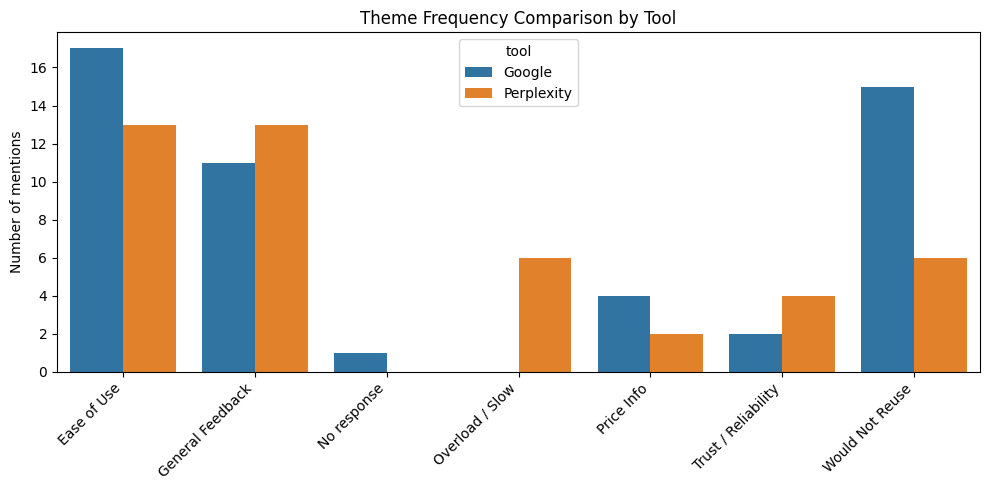

In [ ]:
# Compare raw and percentage theme frequencies between Google vs Perplexity
theme_freq_long = (
    theme_counts
    .rename_axis("tool")
    .reset_index()
    .melt(id_vars="tool", var_name="theme", value_name="count")
    .sort_values(["theme", "tool"])
)

theme_pct = (
    theme_counts
    .div(theme_counts.sum(axis=1), axis=0)
    .mul(100)
    .rename_axis("tool")
    .reset_index()
    .melt(id_vars="tool", var_name="theme", value_name="percent")
)

freq_comparison = (
    theme_freq_long
    .merge(theme_pct, on=["tool", "theme"], how="left")
    .sort_values(["theme", "tool"])
)

diff_counts = (
    (theme_counts.loc["Perplexity"] - theme_counts.loc["Google"])
    .to_frame(name="perplexity_minus_google")
    .sort_values("perplexity_minus_google", ascending=False)
)

print("Theme frequencies by tool (counts and percentages):")
display(freq_comparison)

print("Perplexity – Google count differences (positive = higher for Perplexity):")
display(diff_counts)

plt.figure(figsize=(10, 5))
sns.barplot(
    data=theme_freq_long,
    x="theme",
    y="count",
    hue="tool",
    reuse_list = reuse_themes if "reuse_themes" in globals() else []
    all_themes = list(dict.fromkeys(reuse_list + theme_counts.columns.tolist()))
    theme_counts_full = theme_counts.reindex(columns=all_themes, fill_value=0)

    polarity_source = theme_polarity.copy() if "theme_polarity" in globals() else {}
    polarity_alias = {
        "Ease of Use": "Easy Use & Clarity",
        "Price Info": "Price & Specs Coverage",
        "Overload / Slow": "Info Overload & Slow",
        "No response": "General Feedback",
    }

    def polarity_lookup(name):
        canonical = polarity_alias.get(name, name)
        return polarity_source.get(canonical, 0)

    polarity_order = sorted(
        all_themes,
        key=lambda name: (polarity_lookup(name), -all_themes.index(name)),
        reverse=True,
    )

    theme_freq_long = (
        theme_counts_full.rename_axis("tool")
        .reset_index()
        .melt(id_vars="tool", var_name="theme", value_name="count")
        .sort_values(["theme", "tool"])
    )

    theme_pct = (
        theme_counts_full.div(theme_counts_full.sum(axis=1), axis=0)
        .mul(100)
        .rename_axis("tool")
        .reset_index()
        .melt(id_vars="tool", var_name="theme", value_name="percent")
    )

    freq_comparison = (
        theme_freq_long.merge(theme_pct, on=["tool", "theme"], how="left")
        .sort_values(["theme", "tool"])
    )

    diff_counts = (
        (theme_counts_full.loc["Perplexity"] - theme_counts_full.loc["Google"])
        .to_frame(name="perplexity_minus_google")
        .sort_values("perplexity_minus_google", ascending=False)
    )

    print("Theme frequencies by tool (counts and percentages):")
    display(freq_comparison)

    print("Perplexity – Google count differences (positive = higher for Perplexity):")
    display(diff_counts)

    plt.figure(figsize=(10, 5))
    sns.barplot(
        data=theme_freq_long,
        x="theme",
        y="count",
        hue="tool",
        palette=[light_colors[2], light_colors[0]],
        order=polarity_order,
        hue_order=theme_counts_full.index.tolist(),
    )
    plt.title("Theme Frequency Comparison by Tool")
    plt.ylabel("Number of mentions")
    plt.xlabel("")
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()
)
plt.title("Theme Frequency Comparison by Tool")
plt.ylabel("Number of mentions")
plt.xlabel("")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()